In [1]:
#!pip install "geopandas[all]"

In [2]:
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import pandas as pd
import os

In [3]:
world_map = gpd.read_file("ne_110m_admin_0_countries")

In [4]:
df = pd.read_csv(os.path.join("clean_data", "wb_data_combined.csv"))

In [5]:
df[df['Income Group'].isna()]['Country Name'].unique()

array(['Venezuela'], dtype=object)

In [6]:
# venzuela is now a lower middle income group
# https://publications.iadb.org/en/venezuela-still-upper-middle-income-country-estimating-gni-capita-2015-2021
df.loc[df["Country Name"] == "Venezuela", "Income Group"] = "Lower middle income"

In [7]:
df.head(10)

Country Code Country Name                Region Name     Indicator Code  \
0          ABW        Aruba  Latin America & Caribbean     EG.ELC.ACCS.ZS   
1          ABW        Aruba  Latin America & Caribbean  AG.LND.IRIG.AG.ZS   
2          ABW        Aruba  Latin America & Caribbean     AG.LND.AGRI.ZS   
3          ABW        Aruba  Latin America & Caribbean     AG.LND.AGRI.K2   
4          ABW        Aruba  Latin America & Caribbean     NV.AGR.TOTL.ZS   
5          ABW        Aruba  Latin America & Caribbean     NV.AGR.EMPL.KD   
6          ABW        Aruba  Latin America & Caribbean     AG.LND.ARBL.ZS   
7          ABW        Aruba  Latin America & Caribbean  AG.LND.ARBL.HA.PC   
8          ABW        Aruba  Latin America & Caribbean     AG.LND.PRCP.MM   
9          ABW        Aruba  Latin America & Caribbean     AG.PRD.CREL.MT   

                                      Indicator Name Income Group  Year  \
0            Access to electricity (% of population)  High income  2000   
1  Agricultural irrigated land (% of total agricu...  High income  2000   
2                 Agricultural land (% of land area)  High income  2000   
3                         Agricultural land (sq. km)  High income  2000   
4  Agriculture, forestry, and fishing, value adde...  High income  2000   
5  Agriculture, forestry, and fishing, value adde...  High income  2000   
6                       Arable land (% of land area)  High income  2000   
7                  Arable land (hectares per person)  High income  2000   
8       Average precipitation in depth (mm per year)  High income  2000   
9                    Cereal production (metric tons)  High income  2000   

        Measure  
0  9.170000e+01  
1  7.348765e+00  
2  1.111111e+01  
3  2.000000e+01  
4  1.860754e-02  
5  3.996522e+03  
6  1.111111e+01  
7  2.244644e-02  
8  1.792941e+03  
9  1.377060e+08

In [8]:
INDICATORS = [
    "Access to electricity (% of population)",
    "Agricultural irrigated land (% of total agricultural land)",
    "Agricultural land (% of land area)",
    "Agricultural land (sq. km)",
    "Agriculture, forestry, and fishing, value added (% of GDP)",
    "Agriculture, forestry, and fishing, value added per worker (constant 2015 US$)",
    "Arable land (% of land area)",
    "Arable land (hectares per person)",
    "Average precipitation in depth (mm per year)",
    "Cereal production (metric tons)",
    "Cereal yield (kg per hectare)",
    # "Child employment in agriculture (% of economically active children ages 7-14)",
    "Crop production index (2014-2016 = 100)",
    "Droughts, floods, extreme temperatures (% of population, average 1990-2009)",
    "Employment in agriculture (% of total employment) (modeled ILO estimate)",
    "Fertilizer consumption (kilograms per hectare of arable land)",
    "Food imports (% of merchandise imports)",
    "Food production index (2014-2016 = 100)",
    "GDP per capita (constant 2015 US$)",
    "GDP per capita growth (annual %)",
    "Gini index",
    "Literacy rate, adult total (% of people ages 15 and above)",
    "Livestock production index (2014-2016 = 100)",
    "Mortality rate, infant (per 1,000 live births)",
    "Mortality rate, under-5 (per 1,000 live births)",
    "People using at least basic drinking water services (% of population)",
    "People using at least basic sanitation services (% of population)",
    "Political Stability and Absence of Violence/Terrorism: Estimate",
    "Population growth (annual %)",
    "Poverty gap at $2.15 a day (2017 PPP) (%)",
    "Poverty headcount ratio at national poverty lines (% of population)",
    "Prevalence of anemia among children (% of children ages 6-59 months)",
    # "Prevalence of moderate or severe food insecurity in the population (%)",
    # "Prevalence of severe food insecurity in the population (%)",
    "Prevalence of stunting, height for age (% of children under 5)",
    "Prevalence of undernourishment (% of population)",
    "Prevalence of underweight, weight for age (% of children under 5)",
    "Prevalence of wasting, weight for height (% of children under 5)",
    "Refugee population by country or territory of asylum",
    "Renewable internal freshwater resources per capita (cubic meters)",
    "Rural population (% of total population)",
    "School enrollment, primary (% net)",
    "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "Vulnerable employment, total (% of total employment) (modeled ILO estimate)"
]

In [9]:
len(INDICATORS)

41

In [10]:
df = df[df["Indicator Name"].isin(INDICATORS)]
df.head(40)

Country Code Country Name                Region Name     Indicator Code  \
0           ABW        Aruba  Latin America & Caribbean     EG.ELC.ACCS.ZS   
1           ABW        Aruba  Latin America & Caribbean  AG.LND.IRIG.AG.ZS   
2           ABW        Aruba  Latin America & Caribbean     AG.LND.AGRI.ZS   
3           ABW        Aruba  Latin America & Caribbean     AG.LND.AGRI.K2   
4           ABW        Aruba  Latin America & Caribbean     NV.AGR.TOTL.ZS   
5           ABW        Aruba  Latin America & Caribbean     NV.AGR.EMPL.KD   
6           ABW        Aruba  Latin America & Caribbean     AG.LND.ARBL.ZS   
7           ABW        Aruba  Latin America & Caribbean  AG.LND.ARBL.HA.PC   
8           ABW        Aruba  Latin America & Caribbean     AG.LND.PRCP.MM   
9           ABW        Aruba  Latin America & Caribbean     AG.PRD.CREL.MT   
10          ABW        Aruba  Latin America & Caribbean     AG.YLD.CREL.KG   
12          ABW        Aruba  Latin America & Caribbean     AG.PRD.CROP.XD   
13          ABW        Aruba  Latin America & Caribbean     EN.CLC.MDAT.ZS   
14          ABW        Aruba  Latin America & Caribbean     SL.AGR.EMPL.ZS   
15          ABW        Aruba  Latin America & Caribbean     AG.CON.FERT.ZS   
16          ABW        Aruba  Latin America & Caribbean  TM.VAL.FOOD.ZS.UN   
17          ABW        Aruba  Latin America & Caribbean     AG.PRD.FOOD.XD   
18          ABW        Aruba  Latin America & Caribbean     NY.GDP.PCAP.KD   
19          ABW        Aruba  Latin America & Caribbean  NY.GDP.PCAP.KD.ZG   
20          ABW        Aruba  Latin America & Caribbean        SI.POV.GINI   
21          ABW        Aruba  Latin America & Caribbean     SE.ADT.LITR.ZS   
22          ABW        Aruba  Latin America & Caribbean     AG.PRD.LVSK.XD   
23          ABW        Aruba  Latin America & Caribbean     SP.DYN.IMRT.IN   
24          ABW        Aruba  Latin America & Caribbean        SH.DYN.MORT   
25          ABW        Aruba  Latin America & Caribbean     SH.H2O.BASW.ZS   
26          ABW        Aruba  Latin America & Caribbean     SH.STA.BASS.ZS   
27          ABW        Aruba  Latin America & Caribbean             PV.EST   
28          ABW        Aruba  Latin America & Caribbean        SP.POP.GROW   
29          ABW        Aruba  Latin America & Caribbean        SI.POV.GAPS   
30          ABW        Aruba  Latin America & Caribbean        SI.POV.NAHC   
31          ABW        Aruba  Latin America & Caribbean     SH.ANM.CHLD.ZS   
34          ABW        Aruba  Latin America & Caribbean     SH.STA.STNT.ZS   
35          ABW        Aruba  Latin America & Caribbean     SN.ITK.DEFC.ZS   
36          ABW        Aruba  Latin America & Caribbean     SH.STA.MALN.ZS   
37          ABW        Aruba  Latin America & Caribbean     SH.STA.WAST.ZS   
38          ABW        Aruba  Latin America & Caribbean        SM.POP.REFG   
39          ABW        Aruba  Latin America & Caribbean     ER.H2O.INTR.PC   
40          ABW        Aruba  Latin America & Caribbean     SP.RUR.TOTL.ZS   
41          ABW        Aruba  Latin America & Caribbean        SE.PRM.NENR   
42          ABW        Aruba  Latin America & Caribbean     SL.UEM.TOTL.ZS   

                                       Indicator Name Income Group  Year  \
0             Access to electricity (% of population)  High income  2000   
1   Agricultural irrigated land (% of total agricu...  High income  2000   
2                  Agricultural land (% of land area)  High income  2000   
3                          Agricultural land (sq. km)  High income  2000   
4   Agriculture, forestry, and fishing, value adde...  High income  2000   
5   Agriculture, forestry, and fishing, value adde...  High income  2000   
6                        Arable land (% of land area)  High income  2000   
7                   Arable land (hectares per person)  High income  2000   
8        Average precipitation in depth (mm per year)  High income  2000   
9                     Cereal production (met

In [11]:
POSITIVE_INDICATORS = [
    "Cereal yield (kg per hectare)",
    "Food production index (2014-2016 = 100)",
    "Livestock production index (2014-2016 = 100)",
    "Agricultural irrigated land (% of total agricultural land)",
    "Arable land (hectares per person)",
    "GDP per capita (constant 2015 US$)",
    "People using at least basic drinking water services (% of population)",
    "People using at least basic sanitation services (% of population)",
    "Literacy rate, adult total (% of people ages 15 and above)",
    "Political Stability and Absence of Violence/Terrorism: Estimate",
    'GDP per capita growth (annual %)',
    'Arable land (% of land area)',
    'Agricultural land (sq. km)',
    'Cereal production (metric tons)',
    'School enrollment, primary (% net)',
    'Renewable internal freshwater resources per capita (cubic meters)',
    'Agricultural land (% of land area)',
    'Crop production index (2014-2016 = 100)',
    'Food imports (% of merchandise imports)',
    'Agriculture, forestry, and fishing, value added per worker (constant 2015 US$)',
    'Average precipitation in depth (mm per year)',
    'Access to electricity (% of population)',
    'Agriculture, forestry, and fishing, value added (% of GDP)',
    'Fertilizer consumption (kilograms per hectare of arable land)',
    'Employment in agriculture (% of total employment) (modeled ILO estimate)'
]

In [12]:
len(POSITIVE_INDICATORS)

25

In [13]:
NEGATIVE_INDICATORS = [
    "Poverty headcount ratio at national poverty lines (% of population)",
    "Gini index",
    "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "Vulnerable employment, total (% of total employment) (modeled ILO estimate)",
    "Prevalence of undernourishment (% of population)",
    "Prevalence of stunting, height for age (% of children under 5)",
    "Prevalence of wasting, weight for height (% of children under 5)",
    "Prevalence of underweight, weight for age (% of children under 5)",
    "Prevalence of anemia among children (% of children ages 6-59 months)",
    "Droughts, floods, extreme temperatures (% of population, average 1990-2009)",
    "Population growth (annual %)",
    "Refugee population by country or territory of asylum",
    'Mortality rate, under-5 (per 1,000 live births)',
    'Mortality rate, infant (per 1,000 live births)',
    #'Child employment in agriculture (% of economically active children ages 7-14)',
    'Rural population (% of total population)',
    'Poverty gap at $2.15 a day (2017 PPP) (%)'
]

In [14]:
len(NEGATIVE_INDICATORS)

16

In [15]:
df["Measure"] = df.groupby(["Indicator Code", "Indicator Name"])["Measure"].transform(
    lambda x: (
        (x.max() - x) / (x.max() - x.min())
        if x.name[1] in POSITIVE_INDICATORS and x.max() != x.min()
        else (x - x.min()) / (x.max() - x.min()) if x.max() != x.min() else 0
    )
)
df = df.fillna(0)
df.head(22)

Country Code Country Name                Region Name     Indicator Code  \
0           ABW        Aruba  Latin America & Caribbean     EG.ELC.ACCS.ZS   
1           ABW        Aruba  Latin America & Caribbean  AG.LND.IRIG.AG.ZS   
2           ABW        Aruba  Latin America & Caribbean     AG.LND.AGRI.ZS   
3           ABW        Aruba  Latin America & Caribbean     AG.LND.AGRI.K2   
4           ABW        Aruba  Latin America & Caribbean     NV.AGR.TOTL.ZS   
5           ABW        Aruba  Latin America & Caribbean     NV.AGR.EMPL.KD   
6           ABW        Aruba  Latin America & Caribbean     AG.LND.ARBL.ZS   
7           ABW        Aruba  Latin America & Caribbean  AG.LND.ARBL.HA.PC   
8           ABW        Aruba  Latin America & Caribbean     AG.LND.PRCP.MM   
9           ABW        Aruba  Latin America & Caribbean     AG.PRD.CREL.MT   
10          ABW        Aruba  Latin America & Caribbean     AG.YLD.CREL.KG   
12          ABW        Aruba  Latin America & Caribbean     AG.PRD.CROP.XD   
13          ABW        Aruba  Latin America & Caribbean     EN.CLC.MDAT.ZS   
14          ABW        Aruba  Latin America & Caribbean     SL.AGR.EMPL.ZS   
15          ABW        Aruba  Latin America & Caribbean     AG.CON.FERT.ZS   
16          ABW        Aruba  Latin America & Caribbean  TM.VAL.FOOD.ZS.UN   
17          ABW        Aruba  Latin America & Caribbean     AG.PRD.FOOD.XD   
18          ABW        Aruba  Latin America & Caribbean     NY.GDP.PCAP.KD   
19          ABW        Aruba  Latin America & Caribbean  NY.GDP.PCAP.KD.ZG   
20          ABW        Aruba  Latin America & Caribbean        SI.POV.GINI   
21          ABW        Aruba  Latin America & Caribbean     SE.ADT.LITR.ZS   
22          ABW        Aruba  Latin America & Caribbean     AG.PRD.LVSK.XD   

                                       Indicator Name Income Group  Year  \
0             Access to electricity (% of population)  High income  2000   
1   Agricultural irrigated land (% of total agricu...  High income  2000   
2                  Agricultural land (% of land area)  High income  2000   
3                          Agricultural land (sq. km)  High income  2000   
4   Agriculture, forestry, and fishing, value adde...  High income  2000   
5   Agriculture, forestry, and fishing, value adde...  High income  2000   
6                        Arable land (% of land area)  High income  2000   
7                   Arable land (hectares per person)  High income  2000   
8        Average precipitation in depth (mm per year)  High income  2000   
9                     Cereal production (metric tons)  High income  2000   
10                      Cereal yield (kg per hectare)  High income  2000   
12            Crop production index (2014-2016 = 100)  High income  2000   
13  Droughts, floods, extreme temperatures (% of p...  High income  2000   
14  Employment in agriculture (% of total employme...  High income  2000   
15  Fertilizer consumption (kilograms per hectare ...  High income  2000   
16            Food imports (% of merchandise imports)  High income  2000   
17            Food production index (2014-2016 = 100)  High income  2000   
18                 GDP per capita (constant 2015 US$)  High income  2000   
19                   GDP per capita growth (annual %)  High income  2000   
20                                         Gini index  High income  2000   
21  Literacy rate, adult total (% of people ages 1...  High income  2000   
22       Livestock production index (2014-2016 = 100)  High income  2000   

     Measure  
0   0.083669  
1   0.907401  
2   0.874617  
3   0.999999  
4   0.999923  
5   0.969922  
6   0.827343  
7   0.988971  
8   0.449132  
9   0.852752  
10  0.922487  
12  0.862652  
13  0.089214  
14  0.790807  
15  0.999482  
16  0.602906  
17  0.846111  
18  0.840533  
19  0.590682  
20  0.712093  
21  0.031635  
22  0.748581

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186837 entries, 0 to 200507
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Code    186837 non-null  object 
 1   Country Name    186837 non-null  object 
 2   Region Name     186837 non-null  object 
 3   Indicator Code  186837 non-null  object 
 4   Indicator Name  186837 non-null  object 
 5   Income Group    186837 non-null  object 
 6   Year            186837 non-null  int64  
 7   Measure         186837 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 12.8+ MB


### Weights informed by global food security frameworks, such as FAO or WFP:

**Weight Assignment** 

The weight assignment is based on our understanding of different factors. Different organizations use different weights when calculating food insecurity, however, based on the data we have, we have considered the following weight.

Availability	40%
Access	30%
Utilization	15%
Stability	15%

#### Why 4 Pillars ? What is the use of each ?
There are 4 primary pillars considered when talking about food security. Each pillar is of utmost important in determining the food security for particular region. Availaibility focusses on physcial availability of the food that can be due to domestic production or food imports. This index directly increases food insecurity if the availability is low. Next pillar focusses on the economic aspects on whether people or individual households are able to access food. Insecurity increases as the access becomes low specially in economically weaker regions. Utilization focusses on nutritional needs and how the population is able to meet those with diet and healthcare. Indicators pointing to utilization based on the most vulnerable population of a region give direct insights into this index. Last index is stabality, wars, terrorism, population explosion etc. are all aspects that can destabalize a region there by increasing the insecurity. 

Hence, the 4 pillars Availability, Access , Utilization and Stability are the building blocks for overall food security. 


#### Availability
**Definition:** The physical existence of sufficient quantities of food of appropriate quality, supplied through domestic production, imports, or food aid. 
**Dependency:** Food insecurity increases when availability is low.

#### Access
**Definition:** The ability of individuals and households to obtain adequate food through purchase, bartering, or other means.
**Dependency:** Food insecurity is heavily dependent on access.

#### Utilization
**Definition:** The proper use of food, ensuring that nutritional needs are met through adequate diet, clean water, sanitation, and healthcare.
**Dependency:** Food insecurity is also a matter of poor utilization. 

#### Stability
**Definition:** The consistent availability, access, and utilization of food over time, without significant fluctuations.
**Dependency:** Food insecurity worsens in the face of instability.


#### Interconnectedness of the Pillars
These pillars are interdependent; a failure in one can ripple through the others. For example, reduced availability due to a drought may increase food prices, reducing access, and leading to undernutrition (poor utilization). Long-term disruptions can erode stability, causing chronic food insecurity.



### Definiting 4 Pillars of Food Insecurity along with Indicators

The indicators chosen for the Availability Index are relevant and cover key aspects of agricultural availability, such as land use, irrigation, precipitation, production, and resources like freshwater. These indicators align with common metrics used in agricultural sustainability and productivity assessments

In [17]:
AVAILABILITY_INDICATORS = [
    "Agricultural irrigated land (% of total agricultural land)",
    "Agricultural land (sq. km)",
    "Agriculture, forestry, and fishing, value added (% of GDP)",
    "Arable land (% of land area)",
    "Average precipitation in depth (mm per year)",
    "Cereal production (metric tons)",
    "Crop production index (2014-2016 = 100)",
    "Fertilizer consumption (kilograms per hectare of arable land)",
    "Food production index (2014-2016 = 100)",
    "Livestock production index (2014-2016 = 100)",
    "Renewable internal freshwater resources per capita (cubic meters)",
]
AVAILABILITY_WEIGHT = 0.4

The Access Pillar in food security refers to the ability of individuals and households to obtain sufficient, safe, and nutritious food to meet their dietary needs. This pillar focuses on both economic and physical access to food, ensuring that people can afford and physically reach food sources.

In [18]:
ACCESS_INDICATORS = [
    "Access to electricity (% of population)",
    "Employment in agriculture (% of total employment) (modeled ILO estimate)",
    "Food imports (% of merchandise imports)",
    "GDP per capita (constant 2015 US$)",
    "GDP per capita growth (annual %)",
    "Gini index",
    "Literacy rate, adult total (% of people ages 15 and above)",
    "People using at least basic drinking water services (% of population)",
    "People using at least basic sanitation services (% of population)",
    "Poverty gap at $2.15 a day (2017 PPP) (%)",
    "Poverty headcount ratio at national poverty lines (% of population)",
    "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "Vulnerable employment, total (% of total employment) (modeled ILO estimate)",
]
ACCESS_WEIGHT = 0.3

Utilization Index in the context of food security, nutrition, and health outcomes. These indicators focus on health and nutritional status, particularly among vulnerable populations such as children, which are key components of the utilization dimension of food security.

In [19]:
UTILIZATION_INDICATORS = [
    "Mortality rate, infant (per 1,000 live births)",
    "Mortality rate, under-5 (per 1,000 live births)",
    "Prevalence of anemia among children (% of children ages 6-59 months)",
    "Prevalence of stunting, height for age (% of children under 5)",
    "Prevalence of undernourishment (% of population)",
    "Prevalence of underweight, weight for age (% of children under 5)",
    "Prevalence of wasting, weight for height (% of children under 5)",
]
UTILIZATION_WEIGHT = 0.15

The Stability Pillar refers to the ability to consistently access sufficient, nutritious food over time, even in the face of disruptions such as economic shocks, climate events, or political instability.

In [20]:
STABILITY_INDICATORS = [
    "Droughts, floods, extreme temperatures (% of population, average 1990-2009)",
    "Political Stability and Absence of Violence/Terrorism: Estimate",
    "Population growth (annual %)",
    "Rural population (% of total population)",
     "Refugee population by country or territory of asylum",
]
STABILITY_WEIGHT = 0.15

Assigning weights to each indicator as mentioned above.

In [21]:
WEIGHTS = {indicator: 0.0 for indicator in AVAILABILITY_INDICATORS}
WEIGHTS.update({indicator: 0.0 for indicator in ACCESS_INDICATORS})
WEIGHTS.update({indicator: 0.0 for indicator in UTILIZATION_INDICATORS})
WEIGHTS.update({indicator: 0.0 for indicator in STABILITY_INDICATORS})


# availability indicators each contribute 3.6% to FISI
WEIGHTS[AVAILABILITY_INDICATORS[0]] = AVAILABILITY_WEIGHT / len(AVAILABILITY_INDICATORS)
WEIGHTS[AVAILABILITY_INDICATORS[1]] = AVAILABILITY_WEIGHT / len(AVAILABILITY_INDICATORS)
WEIGHTS[AVAILABILITY_INDICATORS[2]] = AVAILABILITY_WEIGHT / len(AVAILABILITY_INDICATORS)
WEIGHTS[AVAILABILITY_INDICATORS[3]] = AVAILABILITY_WEIGHT / len(AVAILABILITY_INDICATORS)
WEIGHTS[AVAILABILITY_INDICATORS[4]] = AVAILABILITY_WEIGHT / len(AVAILABILITY_INDICATORS)
WEIGHTS[AVAILABILITY_INDICATORS[5]] = AVAILABILITY_WEIGHT / len(AVAILABILITY_INDICATORS)
WEIGHTS[AVAILABILITY_INDICATORS[6]] = AVAILABILITY_WEIGHT / len(AVAILABILITY_INDICATORS)
WEIGHTS[AVAILABILITY_INDICATORS[7]] = AVAILABILITY_WEIGHT / len(AVAILABILITY_INDICATORS)
WEIGHTS[AVAILABILITY_INDICATORS[8]] = AVAILABILITY_WEIGHT / len(AVAILABILITY_INDICATORS)
WEIGHTS[AVAILABILITY_INDICATORS[9]] = AVAILABILITY_WEIGHT / len(AVAILABILITY_INDICATORS)
WEIGHTS[AVAILABILITY_INDICATORS[10]] = AVAILABILITY_WEIGHT / len(AVAILABILITY_INDICATORS)

# # access indicators each contribute 2.3% to FISI

WEIGHTS[ACCESS_INDICATORS[0]] = ACCESS_WEIGHT / len(ACCESS_INDICATORS)
WEIGHTS[ACCESS_INDICATORS[1]] = ACCESS_WEIGHT / len(ACCESS_INDICATORS)
WEIGHTS[ACCESS_INDICATORS[2]] = ACCESS_WEIGHT / len(ACCESS_INDICATORS)
WEIGHTS[ACCESS_INDICATORS[3]] = ACCESS_WEIGHT / len(ACCESS_INDICATORS)
WEIGHTS[ACCESS_INDICATORS[4]] = ACCESS_WEIGHT / len(ACCESS_INDICATORS)
WEIGHTS[ACCESS_INDICATORS[5]] = ACCESS_WEIGHT / len(ACCESS_INDICATORS)
WEIGHTS[ACCESS_INDICATORS[6]] = ACCESS_WEIGHT / len(ACCESS_INDICATORS)
WEIGHTS[ACCESS_INDICATORS[7]] = ACCESS_WEIGHT / len(ACCESS_INDICATORS)
WEIGHTS[ACCESS_INDICATORS[8]] = ACCESS_WEIGHT / len(ACCESS_INDICATORS)
WEIGHTS[ACCESS_INDICATORS[9]] = ACCESS_WEIGHT / len(ACCESS_INDICATORS)
WEIGHTS[ACCESS_INDICATORS[10]] = ACCESS_WEIGHT / len(ACCESS_INDICATORS)
WEIGHTS[ACCESS_INDICATORS[11]] = ACCESS_WEIGHT / len(ACCESS_INDICATORS)
WEIGHTS[ACCESS_INDICATORS[12]] = ACCESS_WEIGHT / len(ACCESS_INDICATORS)

# # utilization indicators each contribute 2.1% to FISI

WEIGHTS[UTILIZATION_INDICATORS[0]] = UTILIZATION_WEIGHT / len(UTILIZATION_INDICATORS)
WEIGHTS[UTILIZATION_INDICATORS[1]] = UTILIZATION_WEIGHT / len(UTILIZATION_INDICATORS)
WEIGHTS[UTILIZATION_INDICATORS[2]] = UTILIZATION_WEIGHT / len(UTILIZATION_INDICATORS)
WEIGHTS[UTILIZATION_INDICATORS[3]] = UTILIZATION_WEIGHT / len(UTILIZATION_INDICATORS)
WEIGHTS[UTILIZATION_INDICATORS[4]] = UTILIZATION_WEIGHT / len(UTILIZATION_INDICATORS)
WEIGHTS[UTILIZATION_INDICATORS[5]] = UTILIZATION_WEIGHT / len(UTILIZATION_INDICATORS)
WEIGHTS[UTILIZATION_INDICATORS[6]] = UTILIZATION_WEIGHT / len(UTILIZATION_INDICATORS)


# # stability indicators each contribute 3.7% to FISI
WEIGHTS[STABILITY_INDICATORS[0]] = STABILITY_WEIGHT / len(STABILITY_INDICATORS)
WEIGHTS[STABILITY_INDICATORS[1]] = STABILITY_WEIGHT / len(STABILITY_INDICATORS)
WEIGHTS[STABILITY_INDICATORS[2]] = STABILITY_WEIGHT / len(STABILITY_INDICATORS)
WEIGHTS[STABILITY_INDICATORS[3]] = STABILITY_WEIGHT / len(STABILITY_INDICATORS)
WEIGHTS[STABILITY_INDICATORS[4]] = STABILITY_WEIGHT / len(STABILITY_INDICATORS)

In [22]:
WEIGHTS

{'Agricultural irrigated land (% of total agricultural land)': 0.03636363636363637,
 'Agricultural land (sq. km)': 0.03636363636363637,
 'Agriculture, forestry, and fishing, value added (% of GDP)': 0.03636363636363637,
 'Arable land (% of land area)': 0.03636363636363637,
 'Average precipitation in depth (mm per year)': 0.03636363636363637,
 'Cereal production (metric tons)': 0.03636363636363637,
 'Crop production index (2014-2016 = 100)': 0.03636363636363637,
 'Fertilizer consumption (kilograms per hectare of arable land)': 0.03636363636363637,
 'Food production index (2014-2016 = 100)': 0.03636363636363637,
 'Livestock production index (2014-2016 = 100)': 0.03636363636363637,
 'Renewable internal freshwater resources per capita (cubic meters)': 0.03636363636363637,
 'Access to electricity (% of population)': 0.023076923076923075,
 'Employment in agriculture (% of total employment) (modeled ILO estimate)': 0.023076923076923075,
 'Food imports (% of merchandise imports)': 0.0230769230

## Calculating FISI & Pillar Indexes

In [23]:
df_calc = df.copy()
df_calc["FISI_Weight"] = df_calc["Indicator Name"].map(WEIGHTS)
df_calc["Availability_Weight"] = df_calc["Indicator Name"].map(
    {k: v for k, v in WEIGHTS.items() if k in AVAILABILITY_INDICATORS}
)
df_calc["Access_Weight"] = df_calc["Indicator Name"].map(
    {k: v for k, v in WEIGHTS.items() if k in ACCESS_INDICATORS}
)
df_calc["Utilization_Weight"] = df_calc["Indicator Name"].map(
    {k: v for k, v in WEIGHTS.items() if k in UTILIZATION_INDICATORS}
)
df_calc["Stability_Weight"] = df_calc["Indicator Name"].map(
    {k: v for k, v in WEIGHTS.items() if k in STABILITY_INDICATORS}
)
df_calc["FISI"] = df_calc["Measure"] * df_calc["FISI_Weight"]
df_calc["Availability_Index"] = df_calc["Measure"] * df_calc["Availability_Weight"]
df_calc["Access_Index"] = df_calc["Measure"] * df_calc["Access_Weight"]
df_calc["Utilization_Index"] = df_calc["Measure"] * df_calc["Utilization_Weight"]
df_calc["Stability_Index"] = df_calc["Measure"] * df_calc["Stability_Weight"]


In [24]:
fisi_df = (
    df_calc.groupby(
        ["Country Code", "Country Name", "Region Name", "Income Group", "Year"]
    )[
        [
            "FISI",
            "Availability_Index",
            "Access_Index",
            "Utilization_Index",
            "Stability_Index",
        ]
    ]
    .sum()
    .reset_index()
)
fisi_df

Country Code Country Name                Region Name  \
0             ABW        Aruba  Latin America & Caribbean   
1             ABW        Aruba  Latin America & Caribbean   
2             ABW        Aruba  Latin America & Caribbean   
3             ABW        Aruba  Latin America & Caribbean   
4             ABW        Aruba  Latin America & Caribbean   
...           ...          ...                        ...   
4552          ZWE     Zimbabwe         Sub-Saharan Africa   
4553          ZWE     Zimbabwe         Sub-Saharan Africa   
4554          ZWE     Zimbabwe         Sub-Saharan Africa   
4555          ZWE     Zimbabwe         Sub-Saharan Africa   
4556          ZWE     Zimbabwe         Sub-Saharan Africa   

             Income Group  Year      FISI  Availability_Index  Access_Index  \
0             High income  2000  0.519990            0.343612      0.115065   
1             High income  2001  0.517346            0.341843      0.116128   
2             High income  2002  0.520704            0.342980      0.119114   
3             High income  2003  0.516472            0.341724      0.116621   
4             High income  2004  0.514546            0.341106      0.115548   
...                   ...   ...       ...                 ...           ...   
4552  Lower middle income  2016  0.619059            0.350780      0.159280   
4553  Lower middle income  2017  0.618994            0.357102      0.154330   
4554  Lower middle income  2018  0.619024            0.354494      0.155980   
4555  Lower middle income  2019  0.620436            0.355107      0.165338   
4556  Lower middle income  2020  0.624649            0.354017      0.160481   

      Utilization_Index  Stability_Index  
0              0.026477         0.034836  
1              0.025299         0.034075  
2              0.025058         0.033552  
3              0.024691         0.033437  
4              0.022786         0.035106  
...                 ...              ...  
4552           0.055149         0.053851  
4553           0.053226         0.054337  
4554           0.054169         0.054380  
4555           0.044378         0.055612  
4556           0.053878         0.056273  

[4557 rows x 10 columns]

In [25]:
fisi_df["Availability_Index"] /= AVAILABILITY_WEIGHT
fisi_df["Access_Index"] /= ACCESS_WEIGHT
fisi_df["Utilization_Index"] /= UTILIZATION_WEIGHT
fisi_df["Stability_Index"] /= STABILITY_WEIGHT
fisi_df

Country Code Country Name                Region Name  \
0             ABW        Aruba  Latin America & Caribbean   
1             ABW        Aruba  Latin America & Caribbean   
2             ABW        Aruba  Latin America & Caribbean   
3             ABW        Aruba  Latin America & Caribbean   
4             ABW        Aruba  Latin America & Caribbean   
...           ...          ...                        ...   
4552          ZWE     Zimbabwe         Sub-Saharan Africa   
4553          ZWE     Zimbabwe         Sub-Saharan Africa   
4554          ZWE     Zimbabwe         Sub-Saharan Africa   
4555          ZWE     Zimbabwe         Sub-Saharan Africa   
4556          ZWE     Zimbabwe         Sub-Saharan Africa   

             Income Group  Year      FISI  Availability_Index  Access_Index  \
0             High income  2000  0.519990            0.859030      0.383548   
1             High income  2001  0.517346            0.854607      0.387095   
2             High income  2002  0.520704            0.857450      0.397045   
3             High income  2003  0.516472            0.854309      0.388736   
4             High income  2004  0.514546            0.852766      0.385160   
...                   ...   ...       ...                 ...           ...   
4552  Lower middle income  2016  0.619059            0.876950      0.530933   
4553  Lower middle income  2017  0.618994            0.892754      0.514434   
4554  Lower middle income  2018  0.619024            0.886236      0.519933   
4555  Lower middle income  2019  0.620436            0.887768      0.551127   
4556  Lower middle income  2020  0.624649            0.885043      0.534936   

      Utilization_Index  Stability_Index  
0              0.176516         0.232242  
1              0.168661         0.227170  
2              0.167056         0.223681  
3              0.164603         0.222911  
4              0.151908         0.234038  
...                 ...              ...  
4552           0.367658         0.359006  
4553           0.354837         0.362244  
4554           0.361130         0.362536  
4555           0.295856         0.370746  
4556           0.359187         0.375151  

[4557 rows x 10 columns]

In [26]:
fisi_df.describe()

Year         FISI  Availability_Index  Access_Index  \
count  4557.000000  4557.000000         4557.000000   4557.000000   
mean   2010.000000     0.536468            0.854622      0.407009   
std       6.055965     0.064917            0.044544      0.100088   
min    2000.000000     0.395077            0.648791      0.237313   
25%    2005.000000     0.488463            0.828641      0.328354   
50%    2010.000000     0.516731            0.858966      0.375514   
75%    2015.000000     0.578962            0.885244      0.467293   
max    2020.000000     0.736780            0.972915      0.700365   

       Utilization_Index  Stability_Index  
count        4557.000000      4557.000000  
mean            0.221427         0.262018  
std             0.154216         0.089926  
min             0.013752         0.073457  
25%             0.105605         0.186459  
50%             0.160864         0.256476  
75%             0.328001         0.329875  
max             0.742524         0.544281

## Plotting FISI on world map

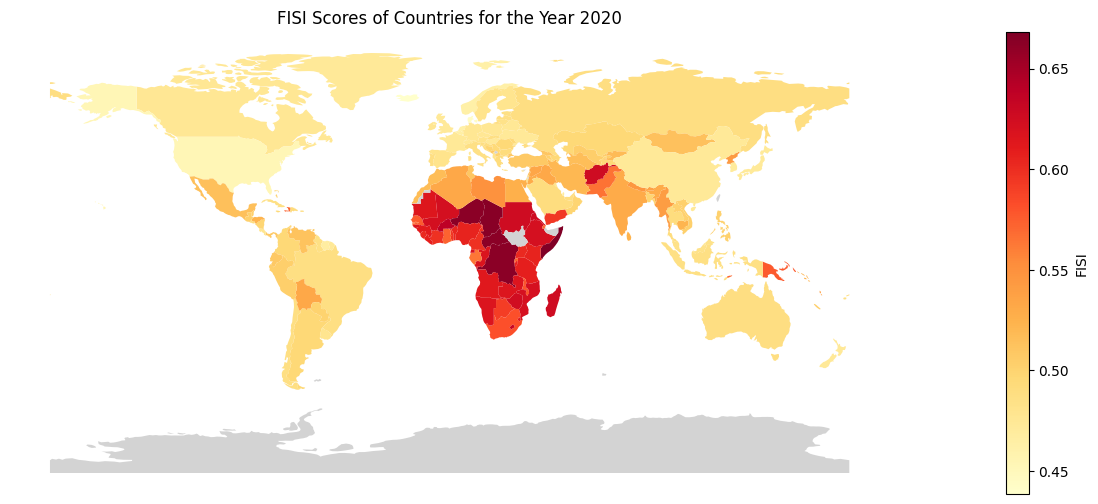

In [27]:
fig, ax = plt.subplots(figsize=(30, 6))
country_data = fisi_df[fisi_df["Year"] == 2020][
    ["Country Code", "FISI"]
]
country_data = {
    record["Country Code"]: record["FISI"]
    for record in country_data.to_dict(orient="records")
}
world_map["values"] = world_map["ADM0_A3"].map(country_data)
world_map.plot(
    column="values",
    ax=ax,
    legend=True,
    legend_kwds={"label": "FISI"},
    missing_kwds={"color": "lightgrey"},
    cmap="YlOrRd",
)
_ = ax.axis("off")
_ = ax.set_title(f"FISI Scores of Countries for the Year 2020")

## Plotting Indexes on world map

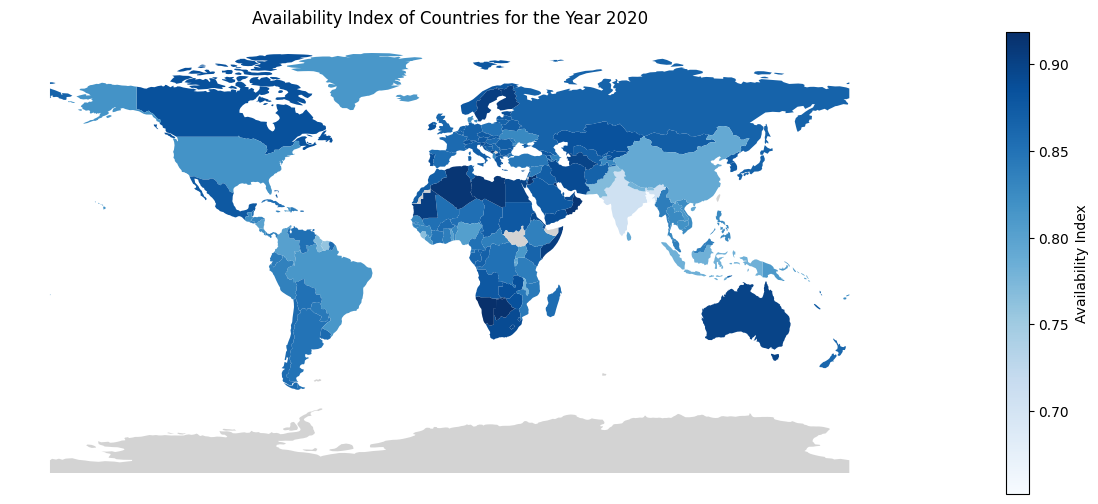

In [28]:
fig, ax = plt.subplots(figsize=(30, 6))
country_data = fisi_df[fisi_df["Year"] == 2020][
    ["Country Code", "Availability_Index"]
]
country_data = {
    record["Country Code"]: record["Availability_Index"]
    for record in country_data.to_dict(orient="records")
}
world_map["values"] = world_map["ADM0_A3"].map(country_data)
world_map.plot(
    column="values",
    ax=ax,
    legend=True,
    legend_kwds={"label": "Availability Index"},
    missing_kwds={"color": "lightgrey"},
    cmap="Blues",
)
_ = ax.axis("off")
_ = ax.set_title(f"Availability Index of Countries for the Year 2020")

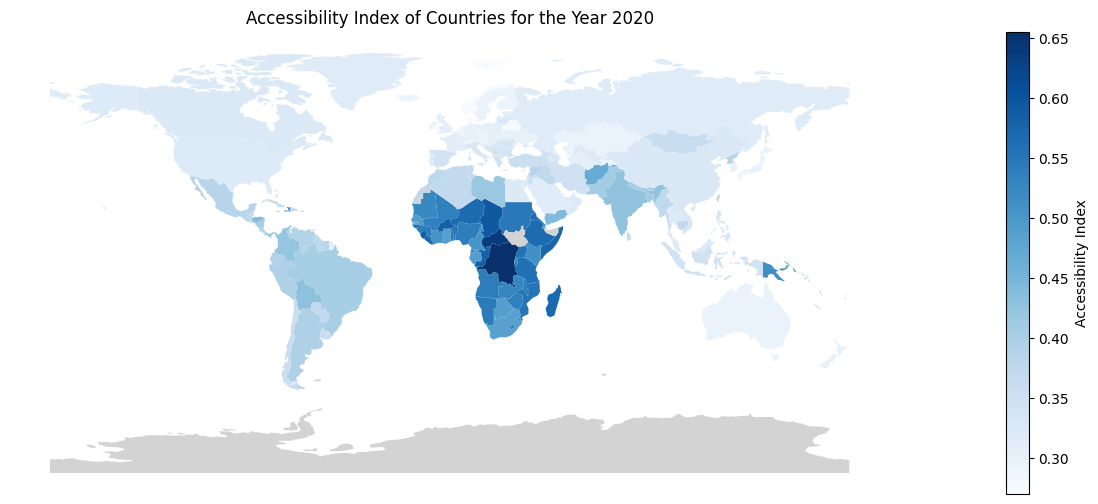

In [29]:
fig, ax = plt.subplots(figsize=(30, 6))
country_data = fisi_df[fisi_df["Year"] == 2020][
    ["Country Code", "Access_Index"]
]
country_data = {
    record["Country Code"]: record["Access_Index"]
    for record in country_data.to_dict(orient="records")
}
world_map["values"] = world_map["ADM0_A3"].map(country_data)
world_map.plot(
    column="values",
    ax=ax,
    legend=True,
    legend_kwds={"label": "Accessibility Index"},
    missing_kwds={"color": "lightgrey"},
    cmap="Blues",
)
_ = ax.axis("off")
_ = ax.set_title(f"Accessibility Index of Countries for the Year 2020")

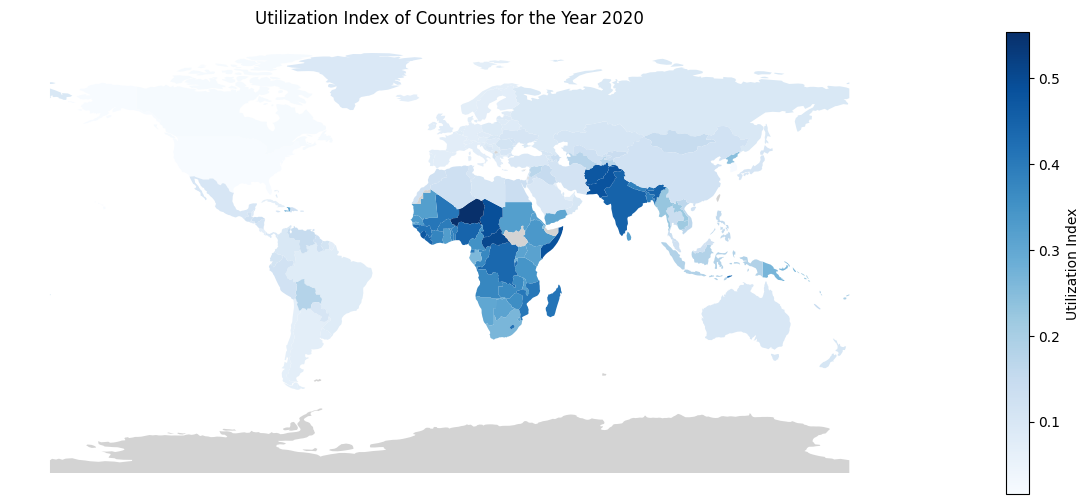

In [30]:
fig, ax = plt.subplots(figsize=(30, 6))
country_data = fisi_df[fisi_df["Year"] == 2020][
    ["Country Code", "Utilization_Index"]
]
country_data = {
    record["Country Code"]: record["Utilization_Index"]
    for record in country_data.to_dict(orient="records")
}
world_map["values"] = world_map["ADM0_A3"].map(country_data)
world_map.plot(
    column="values",
    ax=ax,
    legend=True,
    legend_kwds={"label": "Utilization Index"},
    missing_kwds={"color": "lightgrey"},
    cmap="Blues",
)
_ = ax.axis("off")
_ = ax.set_title(f"Utilization Index of Countries for the Year 2020")

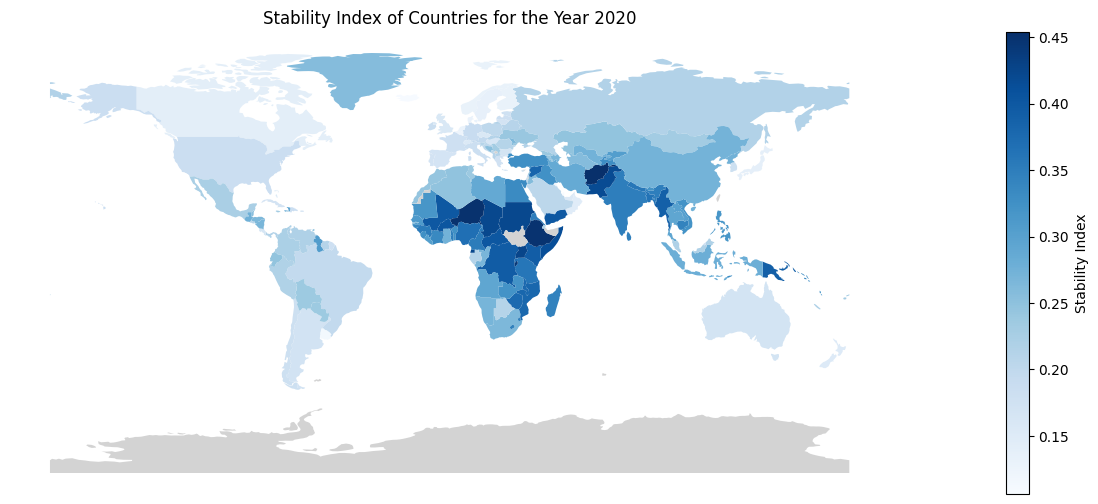

In [31]:
fig, ax = plt.subplots(figsize=(30, 6))
country_data = fisi_df[fisi_df["Year"] == 2020][
    ["Country Code", "Stability_Index"]
]
country_data = {
    record["Country Code"]: record["Stability_Index"]
    for record in country_data.to_dict(orient="records")
}
world_map["values"] = world_map["ADM0_A3"].map(country_data)
world_map.plot(
    column="values",
    ax=ax,
    legend=True,
    legend_kwds={"label": "Stability Index"},
    missing_kwds={"color": "lightgrey"},
    cmap="Blues",
)
_ = ax.axis("off")
_ = ax.set_title(f"Stability Index of Countries for the Year 2020")

In [32]:
world = fisi_df.groupby("Year")["FISI"].mean().reset_index()
world.head()

Year      FISI
0  2000  0.558228
1  2001  0.557636
2  2002  0.557070
3  2003  0.553207
4  2004  0.547605

## Plotting FISI over the years

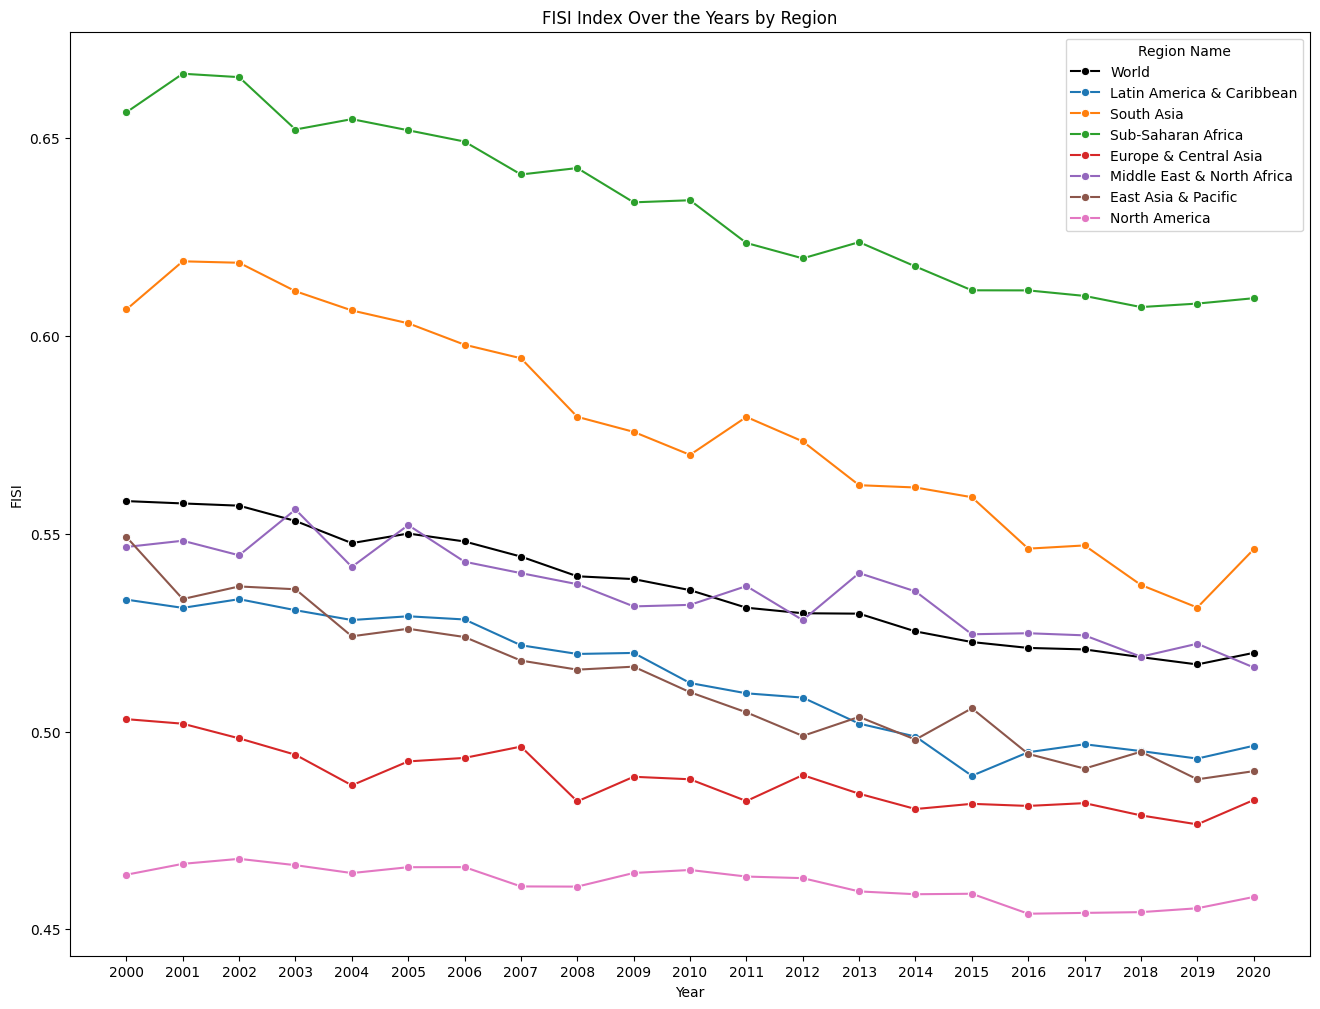

In [33]:
fig, ax = plt.subplots(figsize=(16, 12))
_ = sns.lineplot(
    world,
    x="Year",
    y="FISI",
    label="World",
    c="black",
    errorbar=None,
    marker="o",
    legend="brief",
    ax=ax,
)
_ = sns.lineplot(
    fisi_df,
    x="Year",
    y="FISI",
    hue="Region Name",
    marker="o",
    errorbar=None,
    legend="brief",
    ax=ax,
)
_ = ax.set_xticks([year for year in range(2000, 2021)])
_= ax.set_title("FISI Index Over the Years by Region")

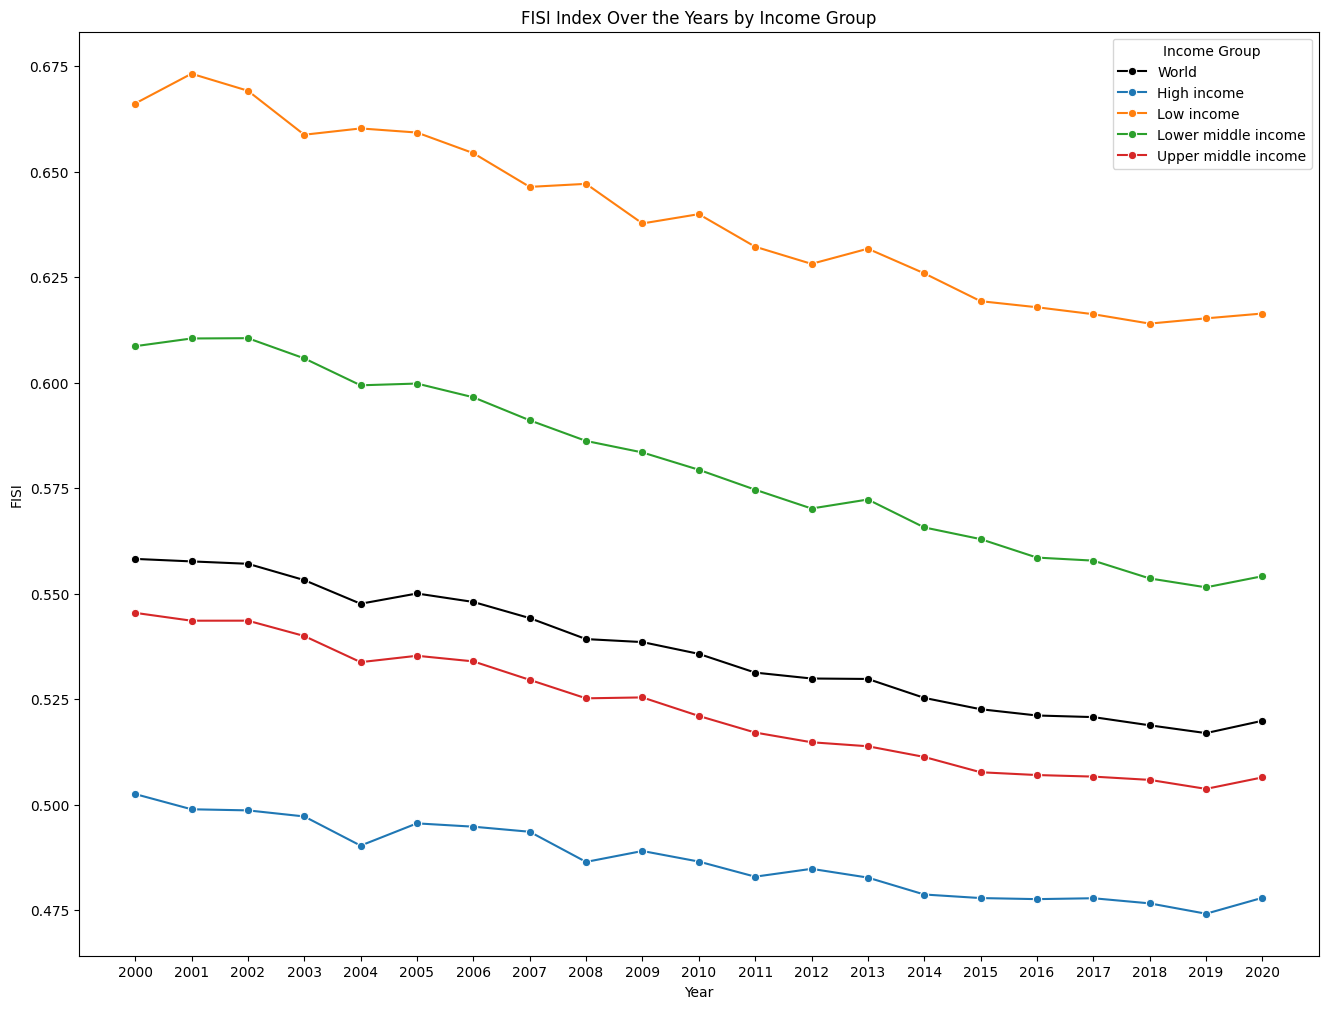

In [34]:
fig, ax = plt.subplots(figsize=(16, 12))
_ = sns.lineplot(
    world,
    x="Year",
    y="FISI",
    label="World",
    c="black",
    errorbar=None,
    marker="o",
    legend="brief",
    ax=ax,
)
_ = sns.lineplot(
    fisi_df,
    x="Year",
    y="FISI",
    hue="Income Group",
    marker="o",
    errorbar=None,
    legend="brief",
    ax=ax,
)
_ = ax.set_xticks([year for year in range(2000, 2021)])
_= ax.set_title("FISI Index Over the Years by Income Group")

Although region and Income group was not used in the FISI calculation still we can see that FISI has clearly distingued between the income groups and regions and didnt overlap them. Hence we can say it is reliable.

In [35]:
# Top countries with low FISI scores
fisi_df.sort_values("FISI").head(10)

Country Code      Country Name            Region Name Income Group  Year  \
2492          MAC  Macao SAR, China    East Asia & Pacific  High income  2014   
2495          MAC  Macao SAR, China    East Asia & Pacific  High income  2017   
2560          MCO            Monaco  Europe & Central Asia  High income  2019   
2497          MAC  Macao SAR, China    East Asia & Pacific  High income  2019   
2559          MCO            Monaco  Europe & Central Asia  High income  2018   
2490          MAC  Macao SAR, China    East Asia & Pacific  High income  2012   
1967          ISL           Iceland  Europe & Central Asia  High income  2014   
1957          ISL           Iceland  Europe & Central Asia  High income  2004   
2494          MAC  Macao SAR, China    East Asia & Pacific  High income  2016   
2496          MAC  Macao SAR, China    East Asia & Pacific  High income  2018   

          FISI  Availability_Index  Access_Index  Utilization_Index  \
2492  0.395077            0.669454      0.272646           0.160068   
2495  0.395888            0.687684      0.265811           0.137032   
2560  0.398427            0.770401      0.237313           0.051602   
2497  0.402094            0.698982      0.269099           0.133855   
2559  0.402447            0.777055      0.244178           0.047340   
2490  0.402597            0.676773      0.276044           0.161754   
1967  0.402671            0.741207      0.279360           0.038946   
1957  0.403326            0.745772      0.277320           0.043323   
2494  0.404080            0.699730      0.271057           0.149290   
2496  0.404558            0.696806      0.271397           0.151722   

      Stability_Index  
2492         0.143279  
2495         0.136775  
2560         0.075551  
2497         0.144622  
2559         0.075138  
2490         0.165409  
1967         0.110258  
1957         0.102153  
2494         0.136518  
2496         0.144390

In [36]:
# Top countries with high FISI scores
fisi_df.sort_values("FISI").tail(10)

Country Code Country Name         Region Name         Income Group  Year  \
3684          SOM      Somalia  Sub-Saharan Africa           Low income  2009   
43            AGO       Angola  Sub-Saharan Africa  Lower middle income  2001   
3680          SOM      Somalia  Sub-Saharan Africa           Low income  2005   
44            AGO       Angola  Sub-Saharan Africa  Lower middle income  2002   
3675          SOM      Somalia  Sub-Saharan Africa           Low income  2000   
3679          SOM      Somalia  Sub-Saharan Africa           Low income  2004   
3681          SOM      Somalia  Sub-Saharan Africa           Low income  2006   
3677          SOM      Somalia  Sub-Saharan Africa           Low income  2002   
3952          TCD         Chad  Sub-Saharan Africa           Low income  2004   
3676          SOM      Somalia  Sub-Saharan Africa           Low income  2001   

          FISI  Availability_Index  Access_Index  Utilization_Index  \
3684  0.722002            0.907656      0.622581           0.640957   
43    0.722762            0.929953      0.646843           0.726653   
3680  0.722827            0.904631      0.653715           0.659910   
44    0.724879            0.927447      0.643905           0.710586   
3675  0.725555            0.891758      0.683570           0.670595   
3679  0.726273            0.905343      0.657476           0.663583   
3681  0.729974            0.908410      0.645585           0.717044   
3677  0.730576            0.902586      0.669280           0.691439   
3952  0.730871            0.920034      0.643861           0.690455   
3676  0.736780            0.910942      0.673699           0.688594   

      Stability_Index  
3684         0.506813  
43           0.318201  
3680         0.439158  
44           0.360940  
3675         0.421277  
3679         0.449037  
3681         0.435855  
3677         0.433612  
3952         0.440870  
3676         0.446695

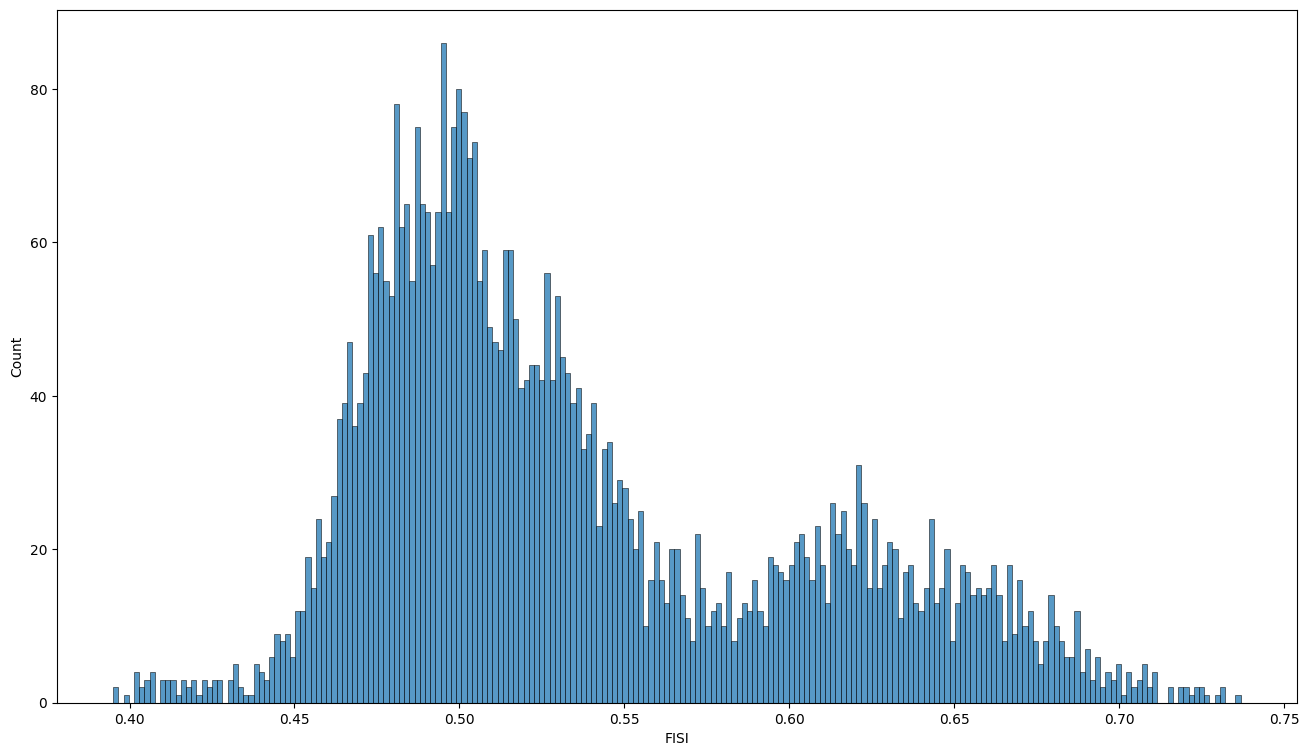

In [37]:
# distribution of FISI score
fig,ax = plt.subplots(figsize = (16,9))
_ = sns.histplot(fisi_df, x="FISI", bins=217, ax=ax)

In [38]:
fisi_df["Risk Category"] = fisi_df["FISI"].apply(
    lambda x: "low risk" if x <= 0.50 else "high risk" if x > 0.63 else "medium risk"
)

In [39]:
fisi_df[fisi_df["Risk Category"] == "low risk"]["Country Name"].unique()

array(['Aruba', 'Albania', 'Andorra', 'United Arab Emirates', 'Argentina',
       'Armenia', 'American Samoa', 'Australia', 'Austria', 'Azerbaijan',
       'Belgium', 'Bangladesh', 'Bulgaria', 'Bahrain', 'The Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda', 'Brazil',
       'Barbados', 'Brunei', 'Canada', 'Switzerland', 'Channel Islands',
       'Chile', 'China', 'Colombia', 'Costa Rica', 'Cuba', 'Curaçao',
       'Cayman Islands', 'Cyprus', 'Czechia', 'Germany', 'Dominica',
       'Denmark', 'Dominican Republic', 'Spain', 'Estonia', 'Finland',
       'Fiji', 'France', 'Faroe Islands', 'United Kingdom', 'Gibraltar',
       'Greece', 'Grenada', 'Greenland', 'Guam', 'Guyana',
       'Hong Kong SAR, China', 'Croatia', 'Hungary', 'Indonesia',
       'Isle of Man', 'Ireland', 'Iceland', 'Israel', 'Italy', 'Jamaica',
       'Japan', 'Kazakhstan', 'Kiribati', 'St. Kitts and Nevis', 'Korea',
       'Kuwait', 'St. Lucia', 'Liechtenstein', 'Lithuania', 'Luxembourg',
   

In [40]:
fisi_df[fisi_df["Risk Category"] == "high risk"]["Country Name"].unique()

array(['Afghanistan', 'Angola', 'Burundi', 'Benin', 'Burkina Faso',
       'Botswana', 'Central African Republic', "Côte d'Ivoire",
       'Cameroon', 'Dem. Rep. Congo', 'Congo', 'Cabo Verde', 'Eritrea',
       'Ethiopia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Equatorial Guinea', 'Haiti', 'Kenya', 'Cambodia', 'Lao PDR',
       'Liberia', 'Lesotho', 'Madagascar', 'Mali', 'Mozambique',
       'Mauritania', 'Malawi', 'Namibia', 'Niger', 'Nigeria', 'Nepal',
       'Papua New Guinea', 'Rwanda', 'Sudan', 'Senegal', 'Sierra Leone',
       'Somalia', 'South Sudan', 'Eswatini', 'Chad', 'Togo',
       'Timor-Leste', 'Tanzania', 'Uganda', 'Yemen', 'South Africa',
       'Zambia', 'Zimbabwe'], dtype=object)

In [41]:
fisi_df[fisi_df["Risk Category"] == "medium risk"]["Country Name"].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania',
       'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa',
       'Antigua and Barbuda', 'Australia', 'Azerbaijan', 'Burundi',
       'Benin', 'Bangladesh', 'Bulgaria', 'Bahrain', 'The Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bolivia', 'Brazil',
       'Barbados', 'Brunei', 'Bhutan', 'Botswana', 'Channel Islands',
       'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'Congo', 'Colombia',
       'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Cayman Islands',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Algeria', 'Ecuador',
       'Egypt', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Faroe Islands',
       'Micronesia', 'Gabon', 'Georgia', 'Ghana', 'Guinea', 'The Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 'Grenada',
       'Guatemala', 'Guam', 'Guyana', 'Hong Kong SAR, China', 'Honduras',
       'Croatia', 'Haiti', 'Indonesia', 'Isle of Man', 'India', 'Ireland',
       '

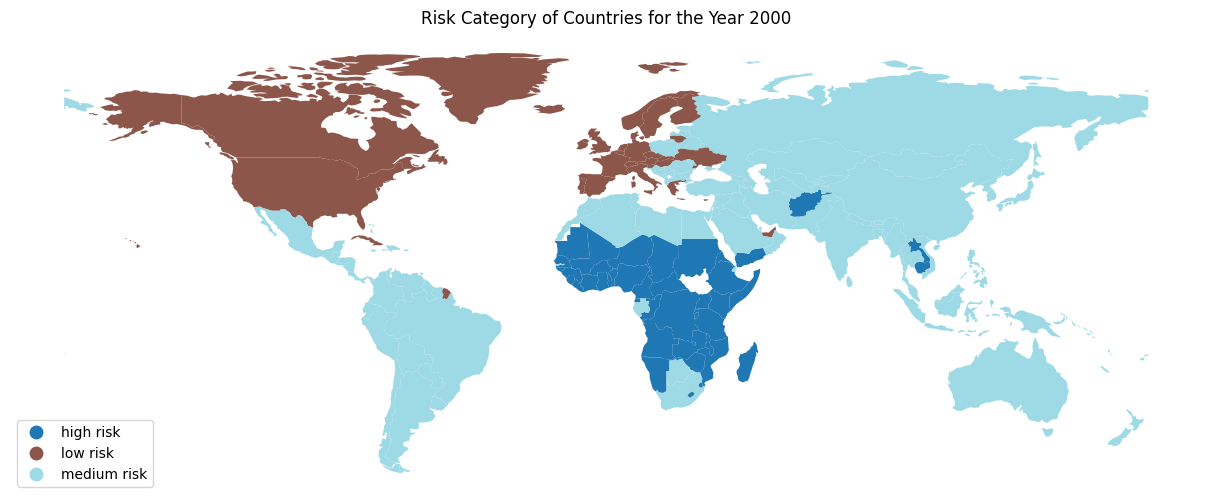

In [42]:
fig, ax = plt.subplots(figsize=(30, 6))
country_data = fisi_df[fisi_df["Year"] == 2000][
    ["Country Code", "Risk Category"]
]
country_data = {
    record["Country Code"]: record["Risk Category"]
    for record in country_data.to_dict(orient="records")
}
world_map["values"] = world_map["ADM0_A3"].map(country_data)
world_map.plot(
    column="values",
    ax=ax,
    legend=True,
    legend_kwds = {'loc': 'lower left'},
    # legend_kwds={"label": "Risk Category"},
    #missing_kwds={"color": "lightgrey"},
    cmap="tab20",
)
_ = ax.axis("off")
_ = ax.set_title(f"Risk Category of Countries for the Year 2000")

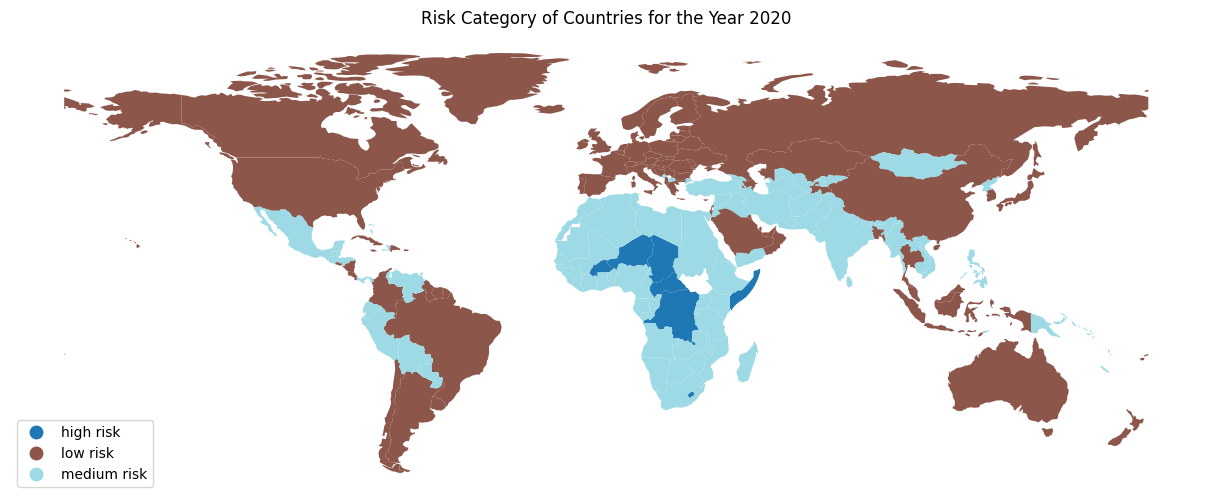

In [43]:
fig, ax = plt.subplots(figsize=(30, 6))
country_data = fisi_df[fisi_df["Year"] == 2020][
    ["Country Code", "Risk Category"]
]
country_data = {
    record["Country Code"]: record["Risk Category"]
    for record in country_data.to_dict(orient="records")
}
world_map["values"] = world_map["ADM0_A3"].map(country_data)
world_map.plot(
    column="values",
    ax=ax,
    legend=True,
    legend_kwds = {'loc': 'lower left'},
    # legend_kwds={"label": "Risk Category"},
    #missing_kwds={"color": "lightgrey"},
    cmap="tab20",
)
_ = ax.axis("off")
_ = ax.set_title(f"Risk Category of Countries for the Year 2020")

In [44]:
fisi_df.to_csv(os.path.join("clean_data", "fisi.csv"), index=False)

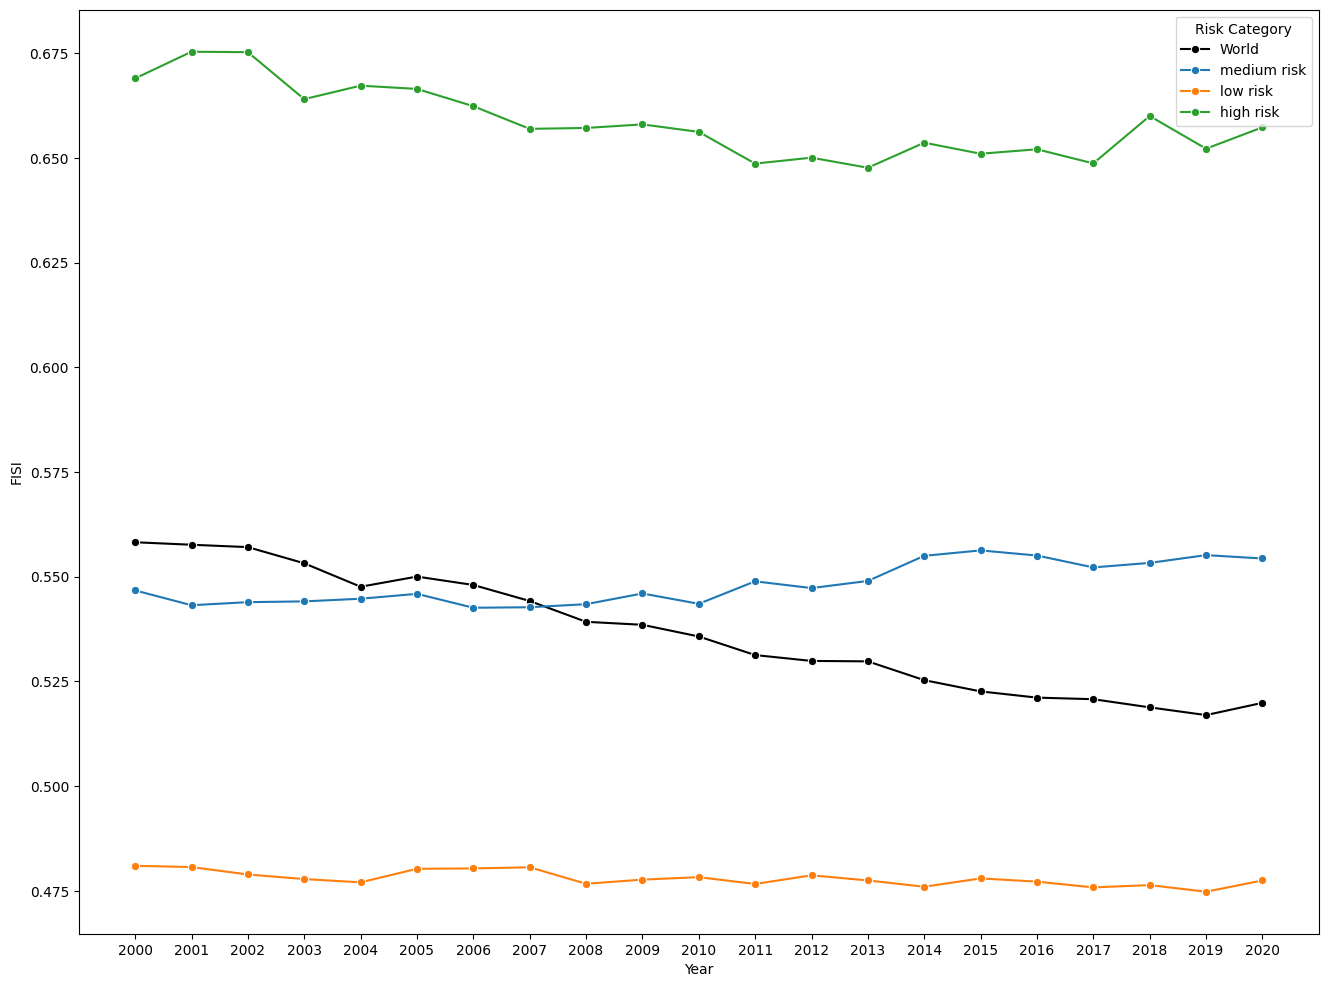

In [45]:
fig, ax = plt.subplots(figsize=(16, 12))
_ = sns.lineplot(
    world,
    x="Year",
    y="FISI",
    label="World",
    c="black",
    errorbar=None,
    marker="o",
    legend="brief",
    ax=ax,
)
_ = sns.lineplot(
    fisi_df,
    x="Year",
    y="FISI",
    hue="Risk Category",
    marker="o",
    errorbar=None,
    legend="brief",
    ax=ax,
)
_ = ax.set_xticks([year for year in range(2000, 2021)])

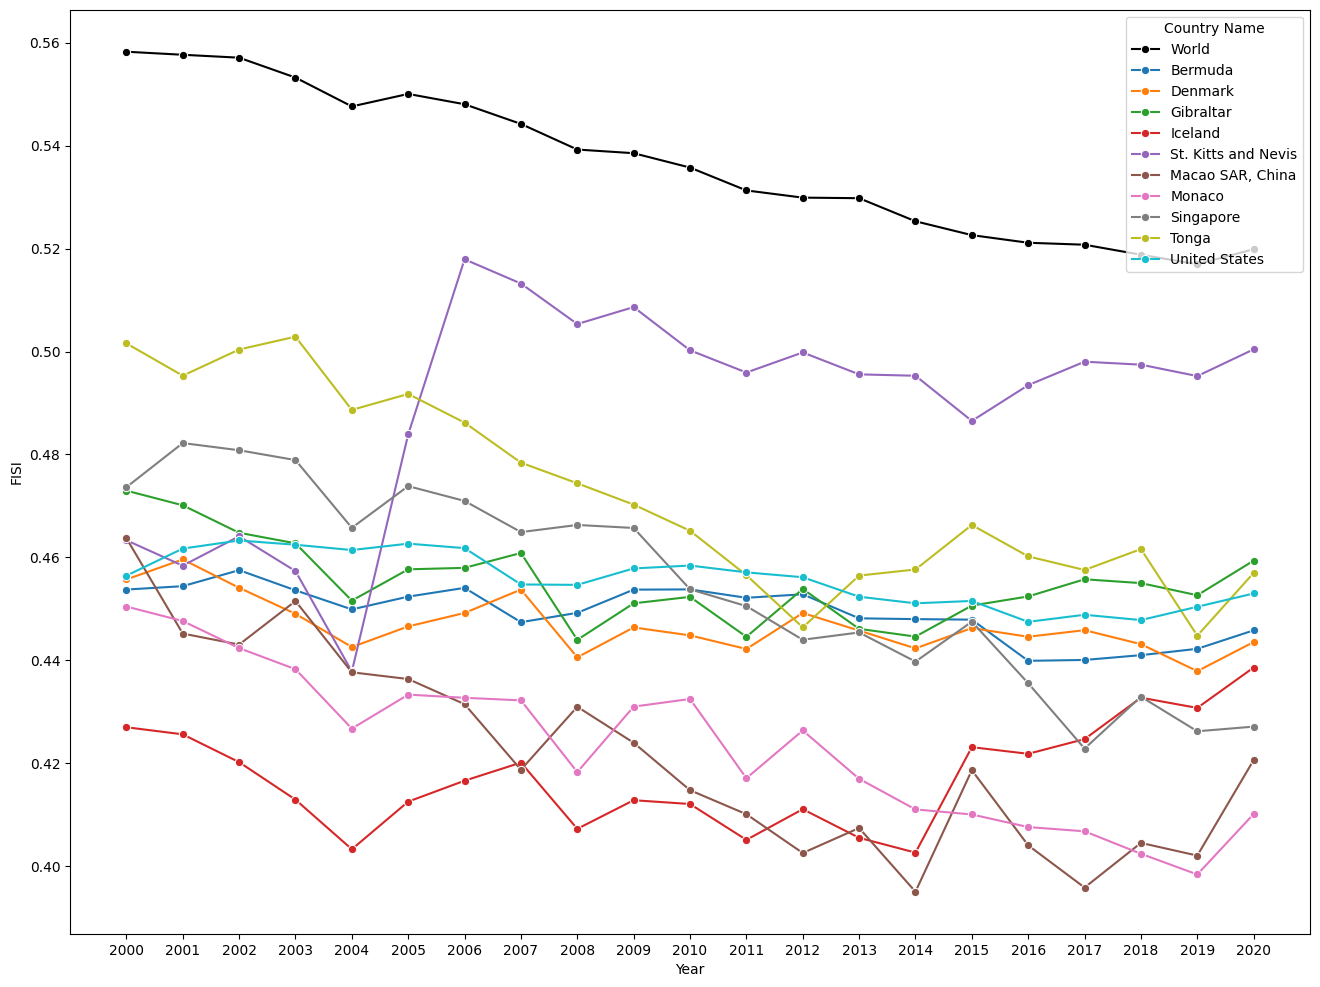

In [46]:
# Countries falling in low risk category anytime in between 2000 to 2021

low_risk_countries = (
    fisi_df[
        (fisi_df["Risk Category"] == "low risk")
        & (fisi_df["Year"].isin([year for year in range(2000, 2021)]))
    ]
    .sort_values("FISI")["Country Name"]
    .unique()
)
fig, ax = plt.subplots(figsize=(16, 12))
_ = sns.lineplot(
    world,
    x="Year",
    y="FISI",
    label="World",
    c="black",
    errorbar=None,
    marker="o",
    legend="brief",
    ax=ax,
)
_ = sns.lineplot(
    fisi_df[fisi_df["Country Name"].isin(low_risk_countries[:10])],
    x="Year",
    y="FISI",
    palette="tab10",
    hue="Country Name",
    marker="o",
    errorbar=None,
    legend="brief",
    ax=ax,
)
_ = ax.set_xticks([year for year in range(2000, 2021)])

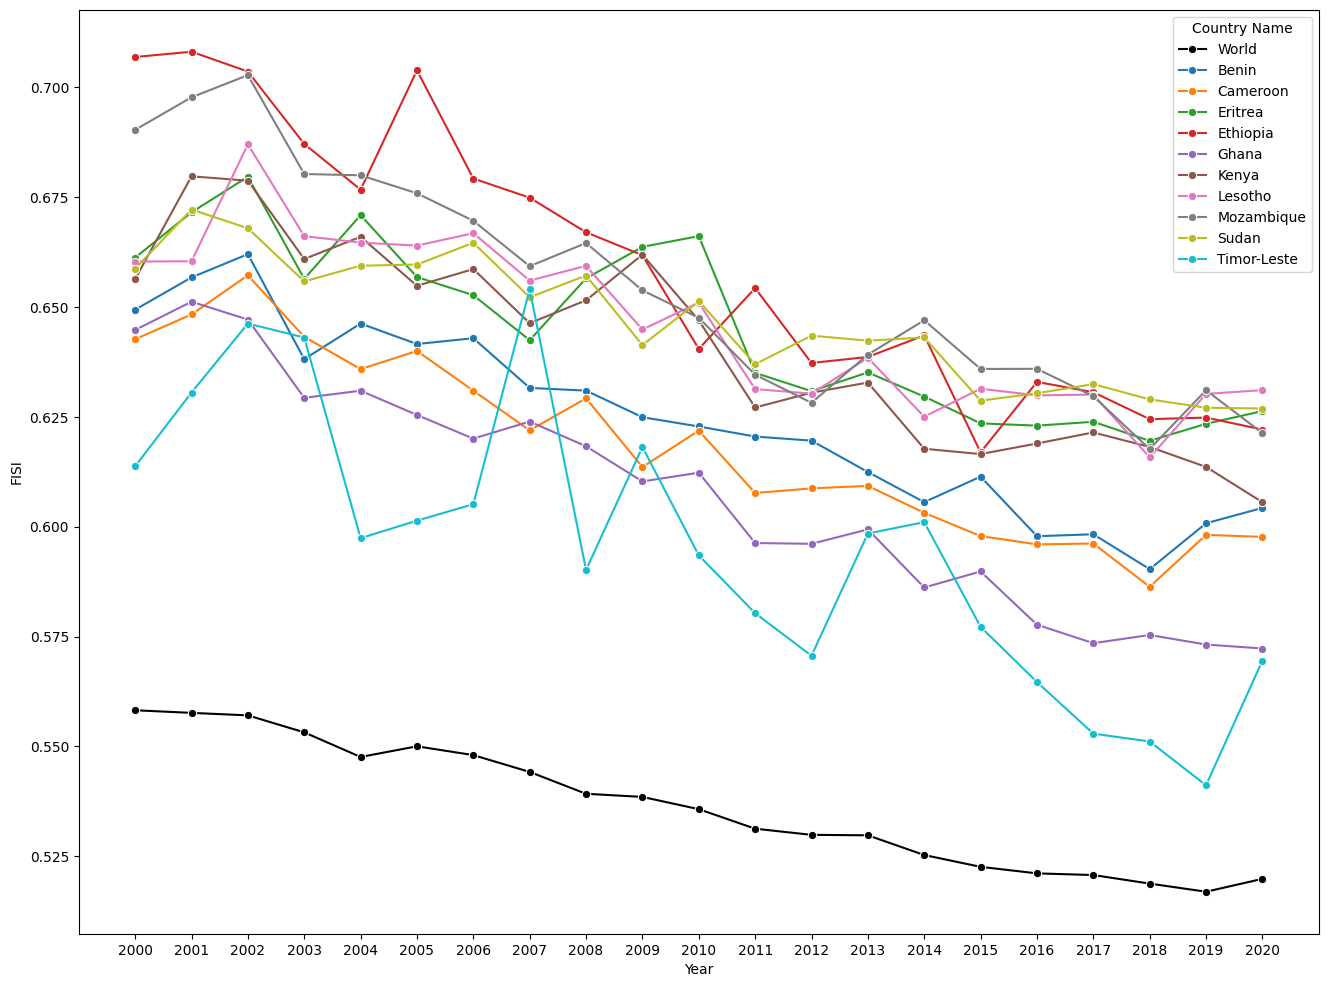

In [47]:
# Countries falling in high risk category anytime in between 2000 to 2021

high_risk_countries = fisi_df[
    (fisi_df["Risk Category"] == "high risk") & (fisi_df["Year"].isin([year for year in range(2000, 2021)]))
].sort_values("FISI")["Country Name"].unique()
fig, ax = plt.subplots(figsize=(16, 12))
_ = sns.lineplot(
    world,
    x="Year",
    y="FISI",
    label="World",
    c="black",
    errorbar=None,
    marker="o",
    legend="brief",
    ax=ax,
)
_ = sns.lineplot(
    fisi_df[fisi_df["Country Name"].isin(high_risk_countries[:10])],
    x="Year",
    y="FISI",
    hue="Country Name",
    marker="o",
    errorbar=None,
    legend="brief",
    ax=ax,
)
_ = ax.set_xticks([year for year in range(2000, 2021)])

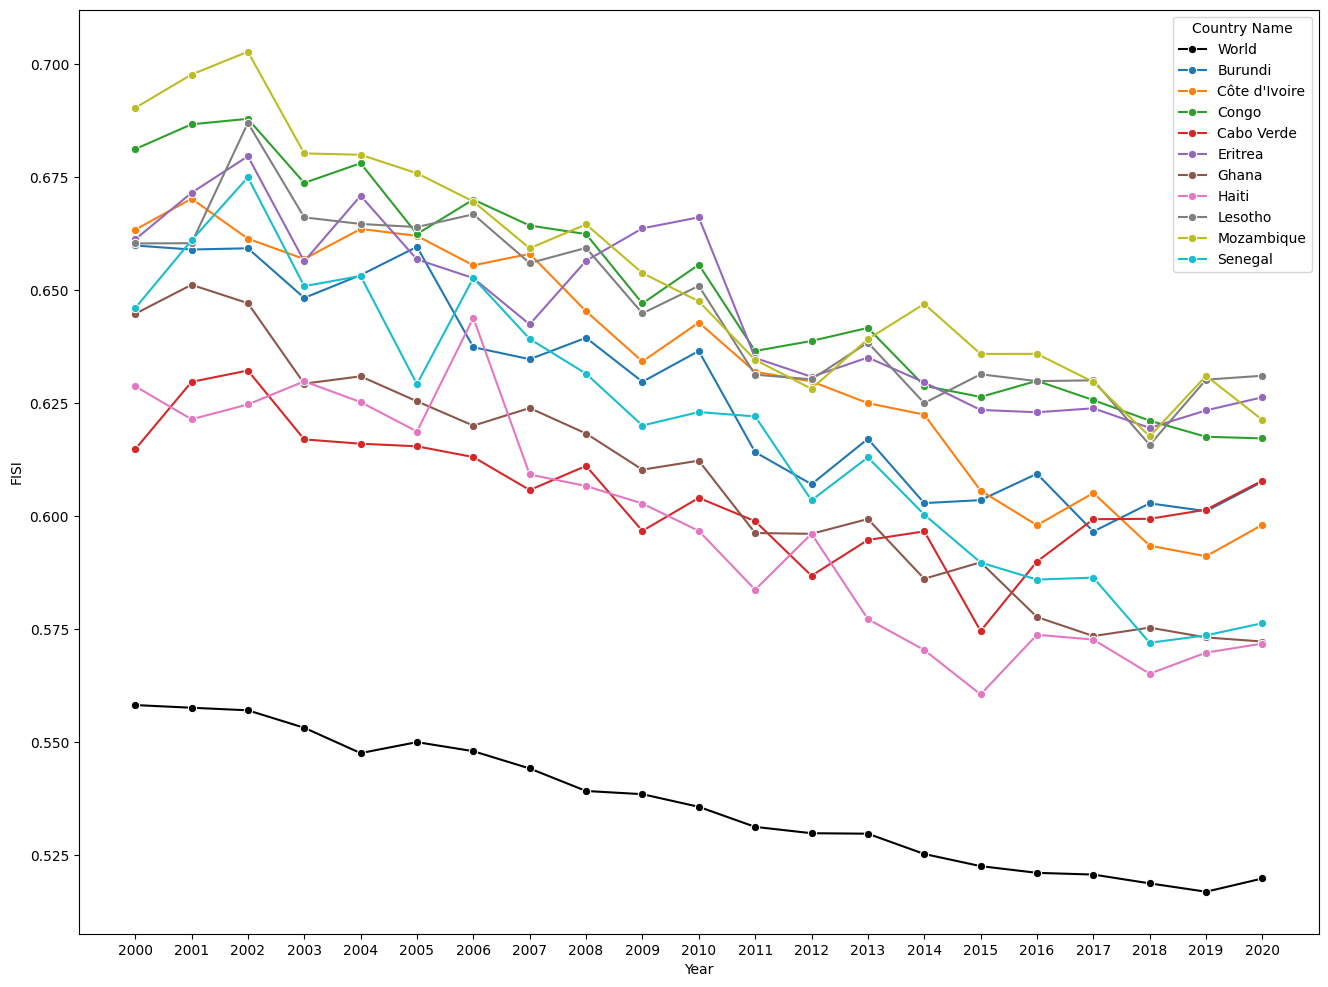

In [48]:
# Countries falling in medium risk category anytime in between 2000 to 2021 but tend towards higher risk

medium_risk_countries = fisi_df[
    (fisi_df["Risk Category"] == "medium risk") & (fisi_df["Year"].isin([year for year in range(2000, 2021)]))
].sort_values("FISI", ascending=False)["Country Name"].unique()
fig, ax = plt.subplots(figsize=(16, 12))
_ = sns.lineplot(
    world,
    x="Year",
    y="FISI",
    label="World",
    c="black",
    errorbar=None,
    marker="o",
    legend="brief",
    ax=ax,
)
_ = sns.lineplot(
    fisi_df[fisi_df["Country Name"].isin(medium_risk_countries[:10])], #first 10 countries
    x="Year",
    y="FISI",
    hue="Country Name",
    marker="o",
    errorbar=None,
    legend="brief",
    ax=ax,
)
_ = ax.set_xticks([year for year in range(2000, 2021)])

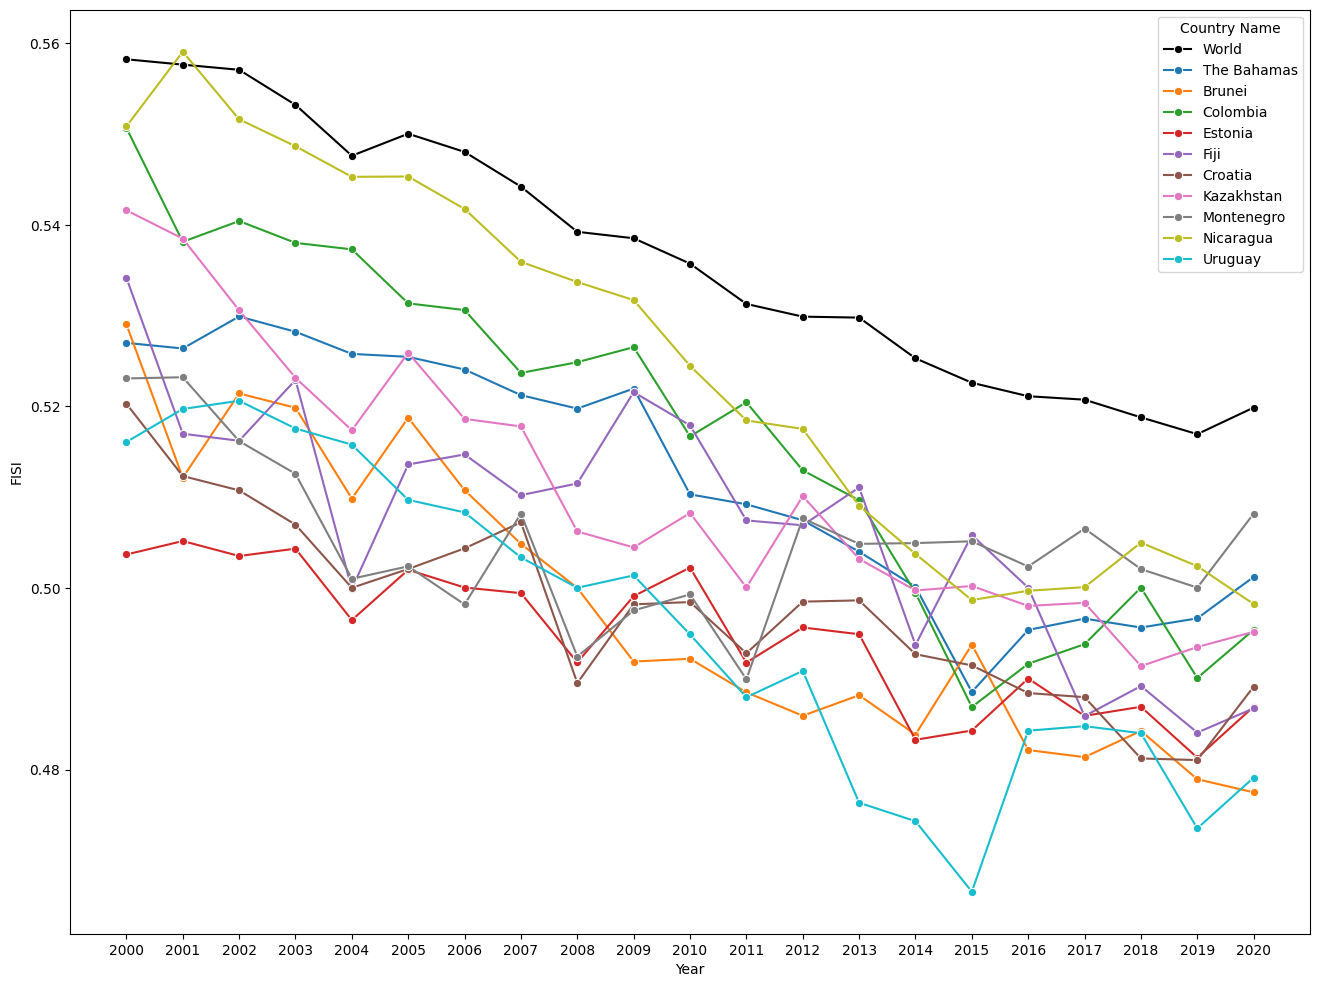

In [49]:
# Countries falling in medium risk category anytime in between 2000 to 2021 but near low risk

medium_risk_countries = fisi_df[
    (fisi_df["Risk Category"] == "medium risk") & (fisi_df["Year"].isin([year for year in range(2000, 2021)]))
].sort_values("FISI")["Country Name"].unique()
fig, ax = plt.subplots(figsize=(16, 12))
_ = sns.lineplot(
    world,
    x="Year",
    y="FISI",
    label="World",
    c="black",
    errorbar=None,
    marker="o",
    legend="brief",
    ax=ax,
)
_ = sns.lineplot(
    fisi_df[fisi_df["Country Name"].isin(medium_risk_countries[:10])], #first 10 countries
    x="Year",
    y="FISI",
    hue="Country Name",
    marker="o",
    errorbar=None,
    legend="brief",
    ax=ax,
)
_ = ax.set_xticks([year for year in range(2000, 2021)])

### Heatmap of FISI with all indicators

In [50]:
wd_data_combined_ind_pivot = (
    df.drop(columns="Indicator Code")
    .pivot(
        index=["Country Code", "Country Name", "Region Name", "Income Group", "Year"],
        columns="Indicator Name",
        values="Measure",
    )
    .merge(
        fisi_df,
        on=["Country Code", "Country Name", "Region Name", "Income Group", "Year"],
        how="left",
    )
)
wd_data_combined_ind_pivot.head()

Country Code Country Name                Region Name Income Group  Year  \
0          ABW        Aruba  Latin America & Caribbean  High income  2000   
1          ABW        Aruba  Latin America & Caribbean  High income  2001   
2          ABW        Aruba  Latin America & Caribbean  High income  2002   
3          ABW        Aruba  Latin America & Caribbean  High income  2003   
4          ABW        Aruba  Latin America & Caribbean  High income  2004   

   Access to electricity (% of population)  \
0                                 0.083669   
1                                 0.000000   
2                                 0.000000   
3                                 0.000000   
4                                 0.000000   

   Agricultural irrigated land (% of total agricultural land)  \
0                                           0.907401            
1                                           0.887827            
2                                           0.920562            
3                                           0.914149            
4                                           0.920071            

   Agricultural land (% of land area)  Agricultural land (sq. km)  \
0                            0.874617                    0.999999   
1                            0.874617                    0.999999   
2                            0.874617                    0.999999   
3                            0.874617                    0.999999   
4                            0.874617                    0.999999   

   Agriculture, forestry, and fishing, value added (% of GDP)  ...  \
0                                           0.999923           ...   
1                                           0.999923           ...   
2                                           0.999930           ...   
3                                           0.999931           ...   
4                                           0.999936           ...   

   Rural population (% of total population)  \
0                                  0.580716   
1                                  0.584836   
2                                  0.588835   
3                                  0.592824   
4                                  0.596813   

   School enrollment, primary (% net)  \
0                            0.025565   
1                            0.074070   
2                            0.063419   
3                            0.082392   
4                            0.072762   

   Unemployment, total (% of total labor force) (modeled ILO estimate)  \
0                                           0.251603                     
1                                           0.240945                     
2                                           0.250139                     
3                                           0.246333                     
4                                           0.232445                     

   Vulnerable employment, total (% of total employment) (modeled ILO estimate)  \
0                                           0.372732                             
1                                           0.374107                             
2                                           0.377023                             
3                                           0.376888                             
4                                           0.370481                             

       FISI  Availability_Index  Access_Index  Utilization_Index  \
0  0.519990            0.859030      0.383548           0.176516   
1  0.517346            0.854607      0.387095           0.168661   
2  0.520704            0.857450      0.397045           0.167056   
3  0.516472            0.854309      0.388736           0.164603   
4  0.514546            0.852766      0.385160           0.151908   

   Stability_Index  Risk Category  
0         0.232242    medium risk  
1         0.227170    medium risk  
2         0.223681    medium risk  
3         0.22

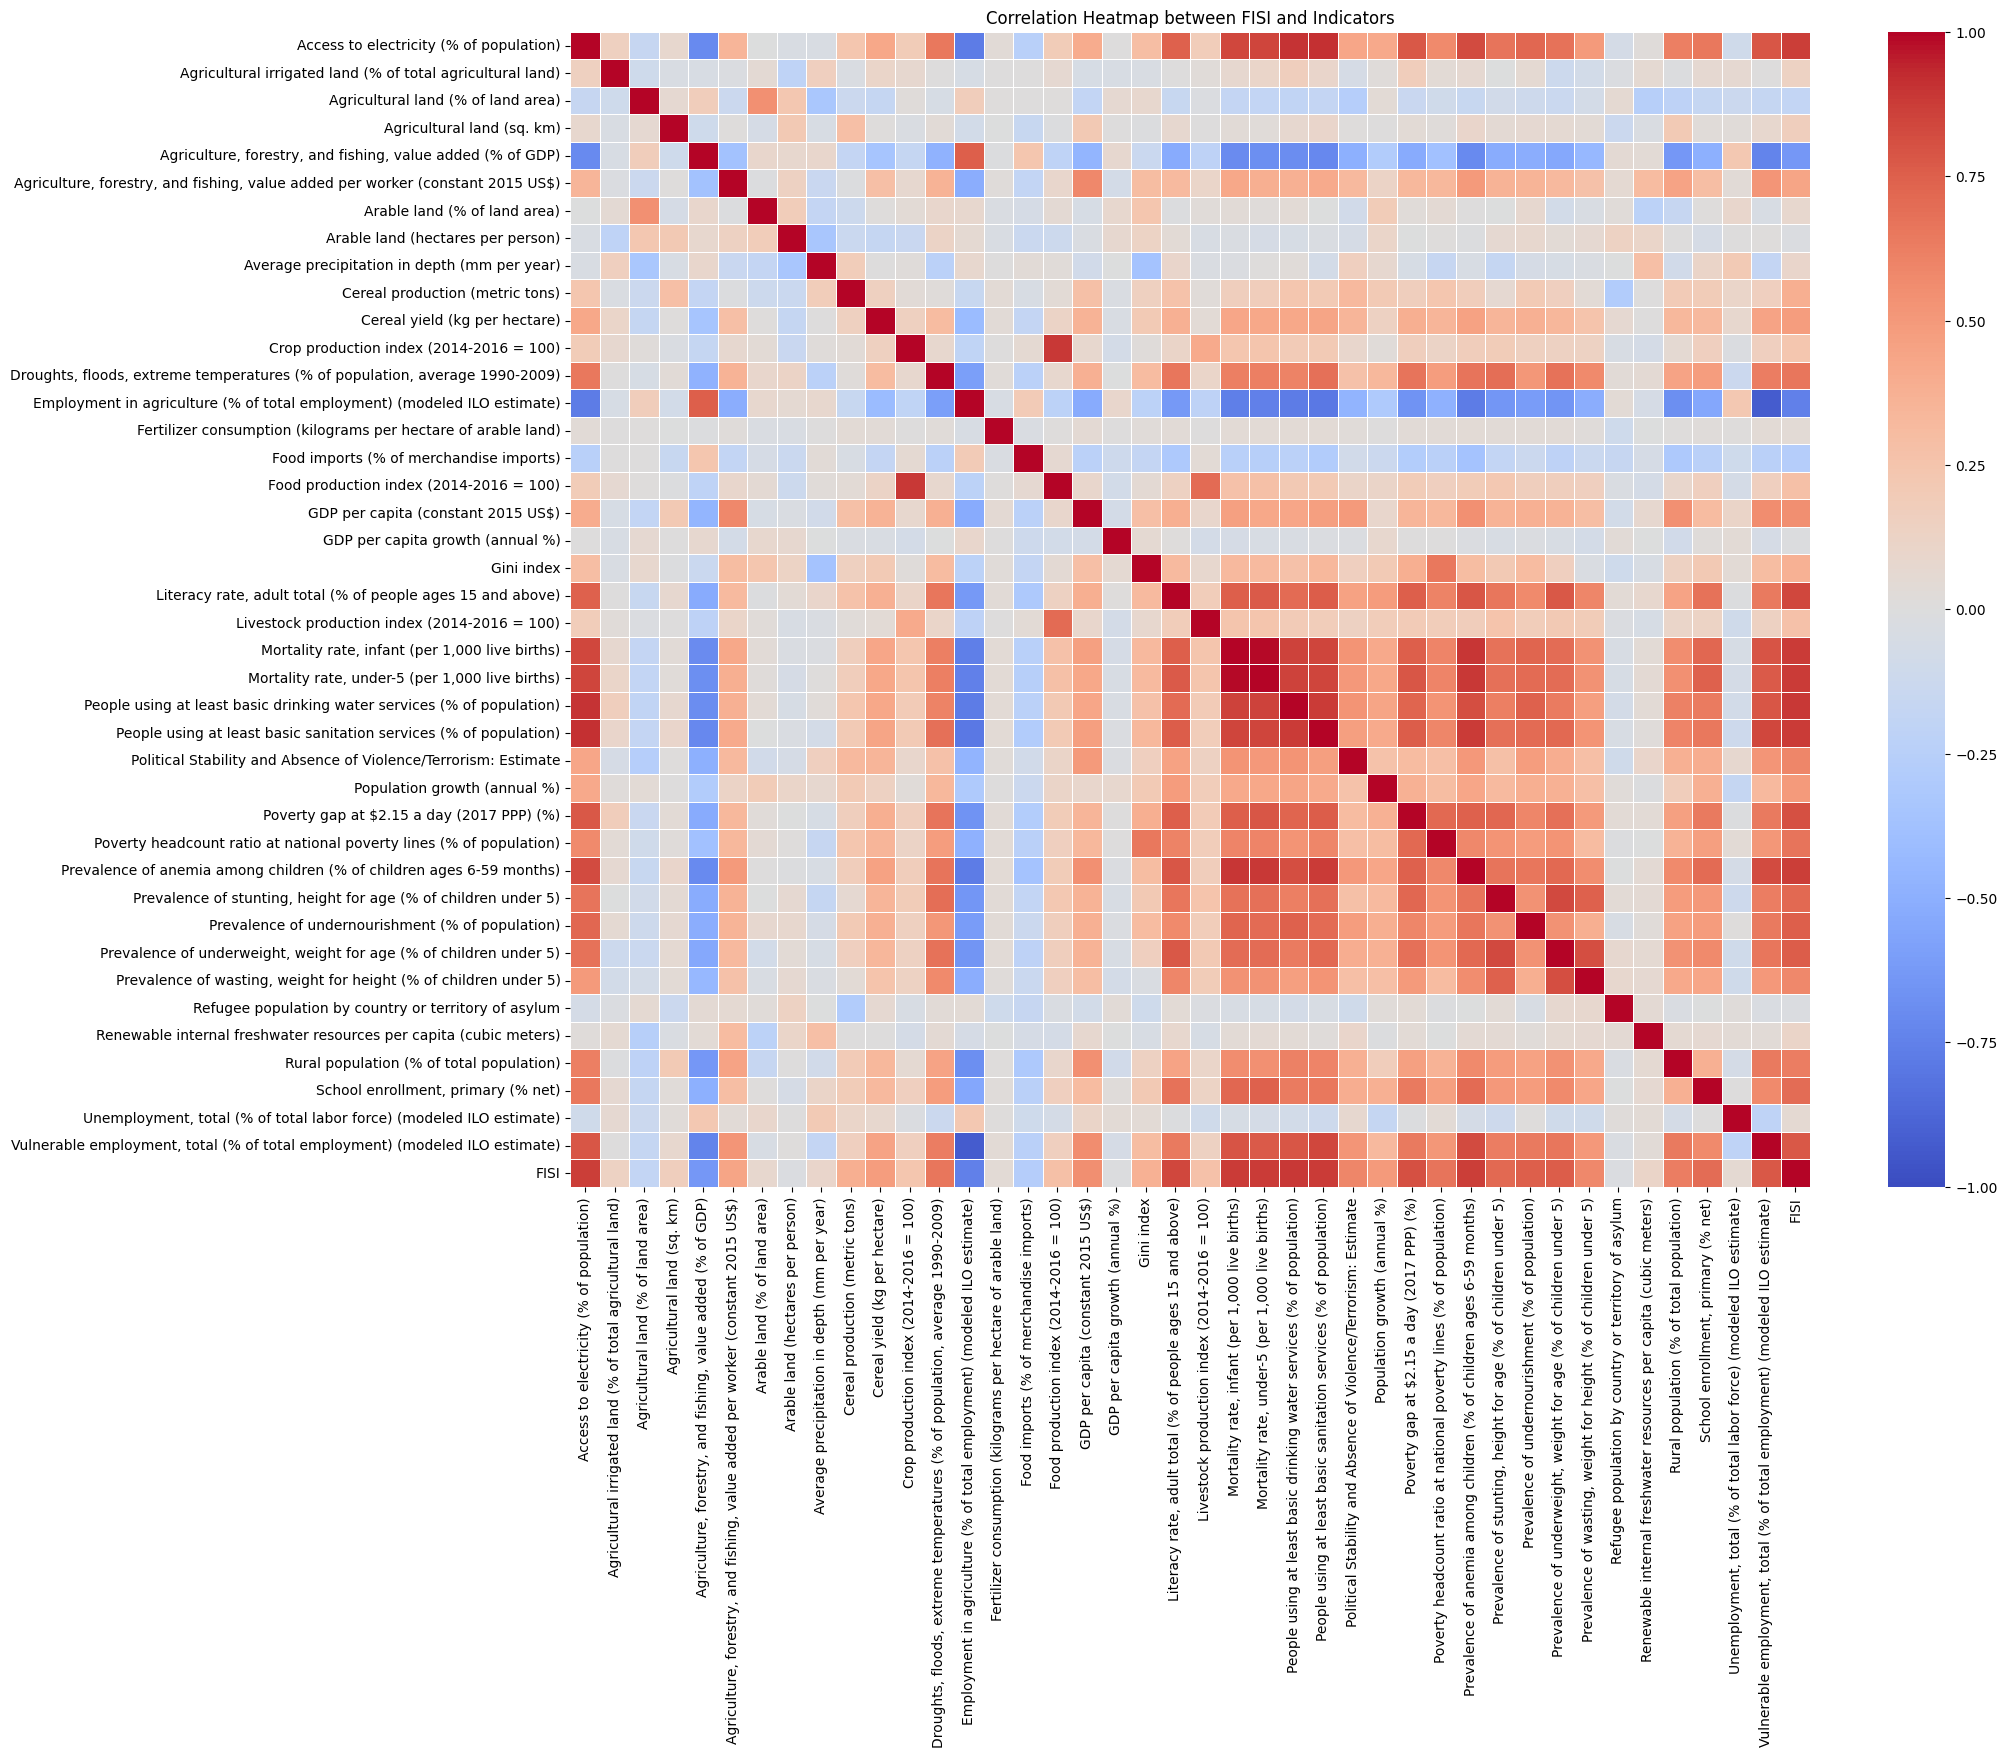

In [51]:
corr_matrix = wd_data_combined_ind_pivot[wd_data_combined_ind_pivot.columns[5:-5]].corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Correlation Heatmap between FISI and Indicators')
plt.show()

In [52]:
# Calculate the correlation matrix
corr_matrix = wd_data_combined_ind_pivot[wd_data_combined_ind_pivot.columns[5:-5]].corr()

# Extract correlation values with FISI
fisi_corr = corr_matrix['FISI'].drop('FISI')  # Dropping FISI itself from the list

# Sort the values in descending order to get the highest correlated indicators
sorted_fisi_corr = fisi_corr.sort_values(ascending=False)

# Display the sorted list
print(sorted_fisi_corr)

People using at least basic drinking water services (% of population)             0.884143
People using at least basic sanitation services (% of population)                 0.881777
Mortality rate, under-5 (per 1,000 live births)                                   0.881691
Mortality rate, infant (per 1,000 live births)                                    0.880632
Access to electricity (% of population)                                           0.874727
Prevalence of anemia among children (% of children ages 6-59 months)              0.870261
Literacy rate, adult total (% of people ages 15 and above)                        0.840276
Poverty gap at $2.15 a day (2017 PPP) (%)                                         0.809525
Vulnerable employment, total (% of total employment) (modeled ILO estimate)       0.776505
Prevalence of underweight, weight for age (% of children under 5)                 0.759879
Prevalence of undernourishment (% of population)                                  0.750295

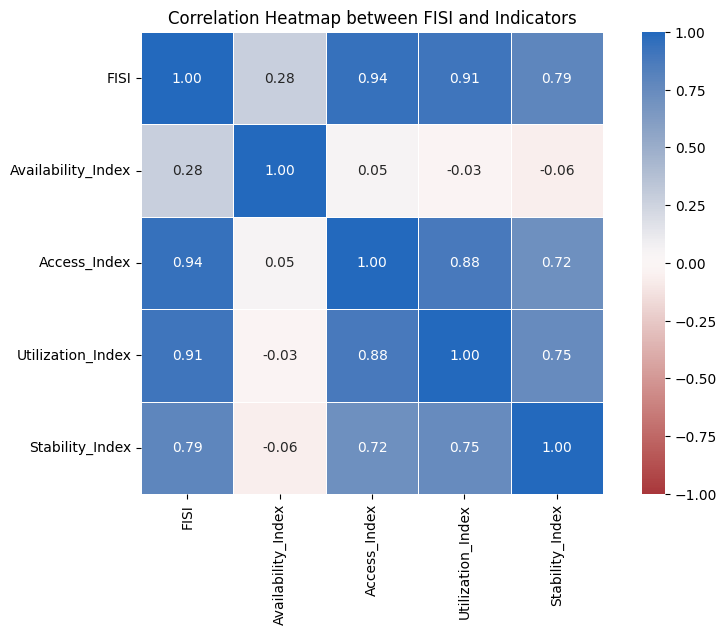

In [53]:
corr_matrix = wd_data_combined_ind_pivot[wd_data_combined_ind_pivot.columns[-6:-1]].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='vlag_r', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1, square=True, center=0)

plt.title('Correlation Heatmap between FISI and Indicators')
plt.show()

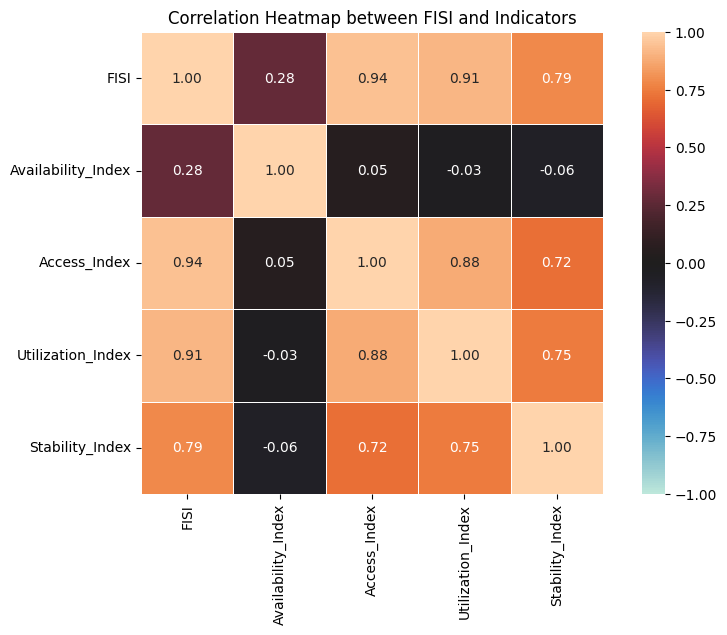

In [54]:
corr_matrix = wd_data_combined_ind_pivot[wd_data_combined_ind_pivot.columns[-6:-1]].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='icefire', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1, square=True, center=0)

plt.title('Correlation Heatmap between FISI and Indicators')
plt.show()

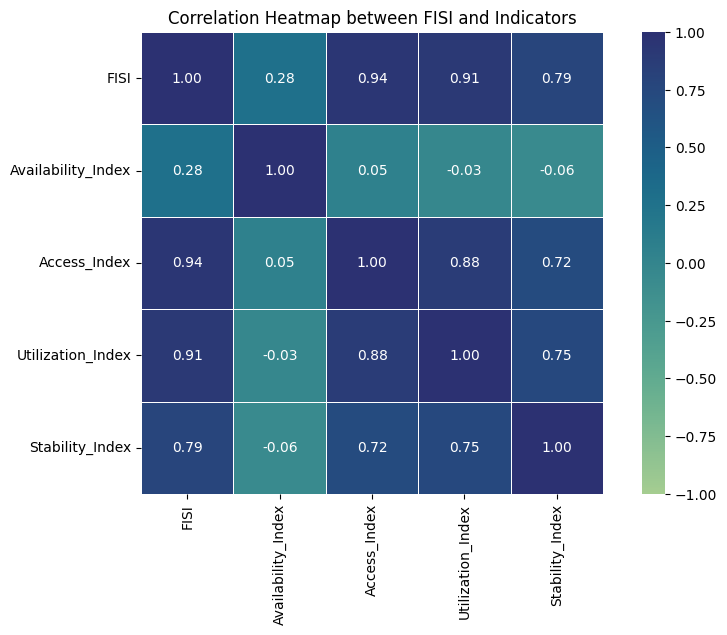

In [55]:
corr_matrix = wd_data_combined_ind_pivot[wd_data_combined_ind_pivot.columns[-6:-1]].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='crest', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1, square=True, center=0)

plt.title('Correlation Heatmap between FISI and Indicators')
plt.show()

## Deriving Additional Indexes

**Access to electricity (% of population):** This factor heavily influences infrastructure because electricity is foundational for development, supporting economic activities, healthcare, education, and modern living standards.

**(1 - Rural population %):** Urban areas generally have better access to infrastructure like roads, internet, and utilities compared to rural areas. By taking 1 - {Rural population (%)}, the formula gives higher scores to countries with lower rural populations, reflecting urbanization and its typical correlation with better infrastructure.

In [56]:
wd_data_combined_ind_pivot["infrastructure_score"] = (
    wd_data_combined_ind_pivot["Access to electricity (% of population)"] * 0.6
    + (1 - wd_data_combined_ind_pivot["Rural population (% of total population)"]) * 0.4
)
wd_data_combined_ind_pivot.head()

Country Code Country Name                Region Name Income Group  Year  \
0          ABW        Aruba  Latin America & Caribbean  High income  2000   
1          ABW        Aruba  Latin America & Caribbean  High income  2001   
2          ABW        Aruba  Latin America & Caribbean  High income  2002   
3          ABW        Aruba  Latin America & Caribbean  High income  2003   
4          ABW        Aruba  Latin America & Caribbean  High income  2004   

   Access to electricity (% of population)  \
0                                 0.083669   
1                                 0.000000   
2                                 0.000000   
3                                 0.000000   
4                                 0.000000   

   Agricultural irrigated land (% of total agricultural land)  \
0                                           0.907401            
1                                           0.887827            
2                                           0.920562            
3                                           0.914149            
4                                           0.920071            

   Agricultural land (% of land area)  Agricultural land (sq. km)  \
0                            0.874617                    0.999999   
1                            0.874617                    0.999999   
2                            0.874617                    0.999999   
3                            0.874617                    0.999999   
4                            0.874617                    0.999999   

   Agriculture, forestry, and fishing, value added (% of GDP)  ...  \
0                                           0.999923           ...   
1                                           0.999923           ...   
2                                           0.999930           ...   
3                                           0.999931           ...   
4                                           0.999936           ...   

   School enrollment, primary (% net)  \
0                            0.025565   
1                            0.074070   
2                            0.063419   
3                            0.082392   
4                            0.072762   

   Unemployment, total (% of total labor force) (modeled ILO estimate)  \
0                                           0.251603                     
1                                           0.240945                     
2                                           0.250139                     
3                                           0.246333                     
4                                           0.232445                     

   Vulnerable employment, total (% of total employment) (modeled ILO estimate)  \
0                                           0.372732                             
1                                           0.374107                             
2                                           0.377023                             
3                                           0.376888                             
4                                           0.370481                             

       FISI  Availability_Index  Access_Index  Utilization_Index  \
0  0.519990            0.859030      0.383548           0.176516   
1  0.517346            0.854607      0.387095           0.168661   
2  0.520704            0.857450      0.397045           0.167056   
3  0.516472            0.854309      0.388736           0.164603   
4  0.514546            0.852766      0.385160           0.151908   

   Stability_Index  Risk Category  infrastructure_score  
0         0.232242    medium risk              0.217915  
1         0.227170    medium risk              0.166066  
2         0.223681    medium risk              0.164466  
3         0.222911    medium risk              0.162870  
4         0.234038    medium risk              0.161275  

[5 rows x 53 columns]

**Agriculture Dependency** 

**Agriculture, forestry, and fishing, value added (% of GDP)**: This indicator reflects the contribution of agriculture and related sectors to the country's GDP. A higher percentage suggests a higher dependency on agriculture.

**Access_Index:** To scale the agricultural dependency, we want to measure the general access to resources like electricity, sanitation, and education etc. By multiplying the dependency by (1 - Access_Index), we assume that hgher level of access reduces the dependency on agriculture. So like, more developed countries might have lower reliance on agriculture for economic activity. 

In [57]:
wd_data_combined_ind_pivot["agricultural_dependency"] = wd_data_combined_ind_pivot[
    "Agriculture, forestry, and fishing, value added (% of GDP)"
] * (1 - wd_data_combined_ind_pivot["Access_Index"])
wd_data_combined_ind_pivot.head()

Country Code Country Name                Region Name Income Group  Year  \
0          ABW        Aruba  Latin America & Caribbean  High income  2000   
1          ABW        Aruba  Latin America & Caribbean  High income  2001   
2          ABW        Aruba  Latin America & Caribbean  High income  2002   
3          ABW        Aruba  Latin America & Caribbean  High income  2003   
4          ABW        Aruba  Latin America & Caribbean  High income  2004   

   Access to electricity (% of population)  \
0                                 0.083669   
1                                 0.000000   
2                                 0.000000   
3                                 0.000000   
4                                 0.000000   

   Agricultural irrigated land (% of total agricultural land)  \
0                                           0.907401            
1                                           0.887827            
2                                           0.920562            
3                                           0.914149            
4                                           0.920071            

   Agricultural land (% of land area)  Agricultural land (sq. km)  \
0                            0.874617                    0.999999   
1                            0.874617                    0.999999   
2                            0.874617                    0.999999   
3                            0.874617                    0.999999   
4                            0.874617                    0.999999   

   Agriculture, forestry, and fishing, value added (% of GDP)  ...  \
0                                           0.999923           ...   
1                                           0.999923           ...   
2                                           0.999930           ...   
3                                           0.999931           ...   
4                                           0.999936           ...   

   Unemployment, total (% of total labor force) (modeled ILO estimate)  \
0                                           0.251603                     
1                                           0.240945                     
2                                           0.250139                     
3                                           0.246333                     
4                                           0.232445                     

   Vulnerable employment, total (% of total employment) (modeled ILO estimate)  \
0                                           0.372732                             
1                                           0.374107                             
2                                           0.377023                             
3                                           0.376888                             
4                                           0.370481                             

       FISI  Availability_Index  Access_Index  Utilization_Index  \
0  0.519990            0.859030      0.383548           0.176516   
1  0.517346            0.854607      0.387095           0.168661   
2  0.520704            0.857450      0.397045           0.167056   
3  0.516472            0.854309      0.388736           0.164603   
4  0.514546            0.852766      0.385160           0.151908   

   Stability_Index  Risk Category  infrastructure_score  \
0         0.232242    medium risk              0.217915   
1         0.227170    medium risk              0.166066   
2         0.223681    medium risk              0.164466   
3         0.222911    medium risk              0.162870   
4         0.234038    medium risk              0.161275   

   agricultural_dependency  
0                 0.616404  
1                 0.612858  
2                 0.602913  
3                 0.611221  
4                 0.614801  

[5 rows x 54 columns]

**Rural population (% of total population):** Rural areas often have limited access to infrastructure, healthcare, and resources, making them more vulnerable to economic and environmental shocks.\
**Agriculture, forestry, and fishing, value added (% of GDP):** A higher dependence on agriculture suggests economic vulnerability due to factors like fluctuating commodity prices, climate change, and natural disasters.\
Access_Index: Dividing by the Access_Index assumes that better access to infrastructure and resources reduces vulnerability.

Countries with high rural populations, significant dependence on agriculture, and low infrastructure access (low Access_Index) will have higher vulnerability scores.\
Conversely, countries with urbanized populations, diversified economies, and robust infrastructure access will have lower scores.

In [58]:
wd_data_combined_ind_pivot["vulnerability_score"] = (
    wd_data_combined_ind_pivot["Rural population (% of total population)"]
    * wd_data_combined_ind_pivot[
        "Agriculture, forestry, and fishing, value added (% of GDP)"
    ]
    / wd_data_combined_ind_pivot["Access_Index"]
)
wd_data_combined_ind_pivot.head()

Country Code Country Name                Region Name Income Group  Year  \
0          ABW        Aruba  Latin America & Caribbean  High income  2000   
1          ABW        Aruba  Latin America & Caribbean  High income  2001   
2          ABW        Aruba  Latin America & Caribbean  High income  2002   
3          ABW        Aruba  Latin America & Caribbean  High income  2003   
4          ABW        Aruba  Latin America & Caribbean  High income  2004   

   Access to electricity (% of population)  \
0                                 0.083669   
1                                 0.000000   
2                                 0.000000   
3                                 0.000000   
4                                 0.000000   

   Agricultural irrigated land (% of total agricultural land)  \
0                                           0.907401            
1                                           0.887827            
2                                           0.920562            
3                                           0.914149            
4                                           0.920071            

   Agricultural land (% of land area)  Agricultural land (sq. km)  \
0                            0.874617                    0.999999   
1                            0.874617                    0.999999   
2                            0.874617                    0.999999   
3                            0.874617                    0.999999   
4                            0.874617                    0.999999   

   Agriculture, forestry, and fishing, value added (% of GDP)  ...  \
0                                           0.999923           ...   
1                                           0.999923           ...   
2                                           0.999930           ...   
3                                           0.999931           ...   
4                                           0.999936           ...   

   Vulnerable employment, total (% of total employment) (modeled ILO estimate)  \
0                                           0.372732                             
1                                           0.374107                             
2                                           0.377023                             
3                                           0.376888                             
4                                           0.370481                             

       FISI  Availability_Index  Access_Index  Utilization_Index  \
0  0.519990            0.859030      0.383548           0.176516   
1  0.517346            0.854607      0.387095           0.168661   
2  0.520704            0.857450      0.397045           0.167056   
3  0.516472            0.854309      0.388736           0.164603   
4  0.514546            0.852766      0.385160           0.151908   

   Stability_Index  Risk Category  infrastructure_score  \
0         0.232242    medium risk              0.217915   
1         0.227170    medium risk              0.166066   
2         0.223681    medium risk              0.164466   
3         0.222911    medium risk              0.162870   
4         0.234038    medium risk              0.161275   

   agricultural_dependency  vulnerability_score  
0                 0.616404             1.513945  
1                 0.612858             1.510717  
2                 0.602913             1.482940  
3                 0.611221             1.524898  
4                 0.614801             1.549423  

[5 rows x 55 columns]

## Plotting additional indexes against FISI

<Figure size 1500x1500 with 0 Axes>

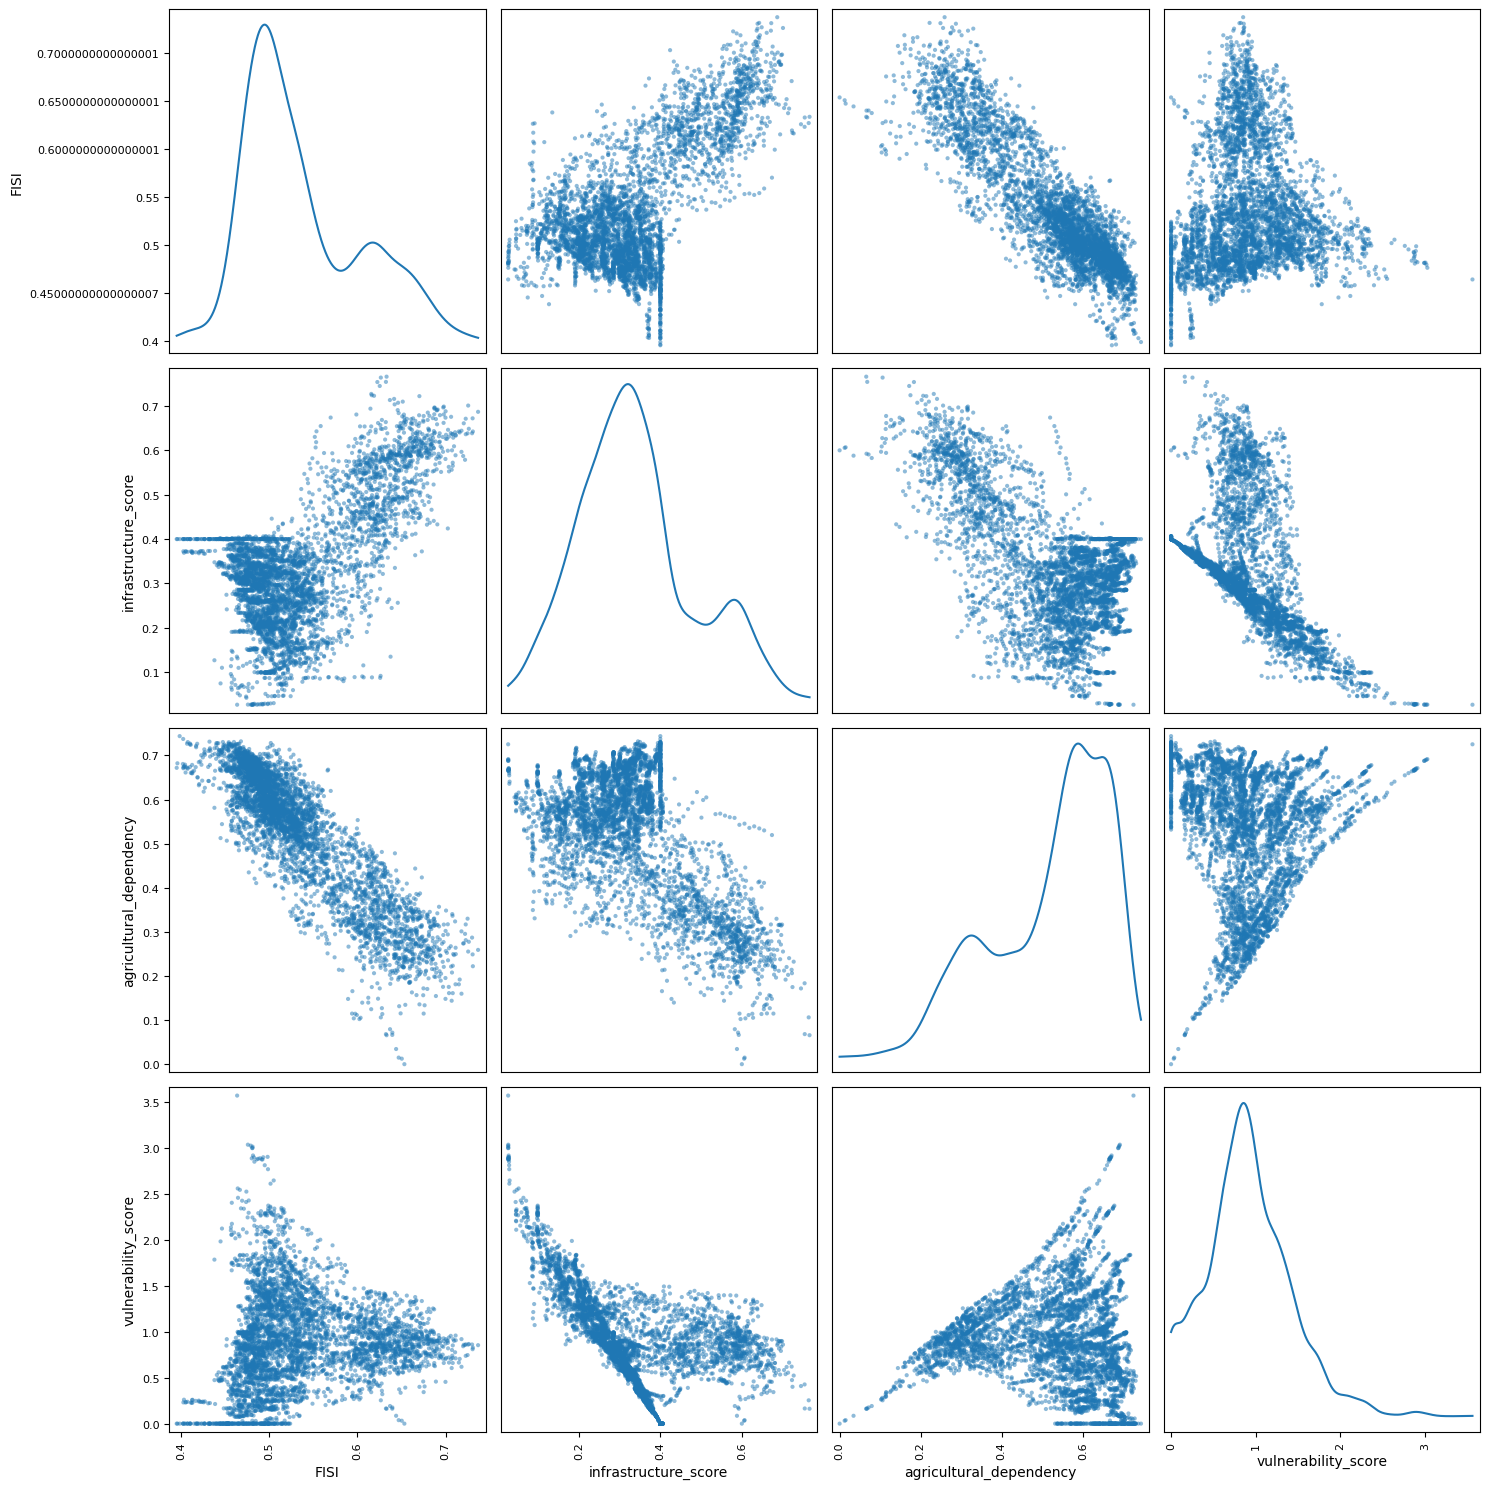

In [59]:
plt.figure(figsize=(15, 15))
scatter_vars = [
    "FISI",
    "infrastructure_score",
    "agricultural_dependency",
    "vulnerability_score",
]
pd.plotting.scatter_matrix(
    wd_data_combined_ind_pivot[scatter_vars], diagonal="kde", figsize=(15, 15)
)
plt.tight_layout()
plt.show()

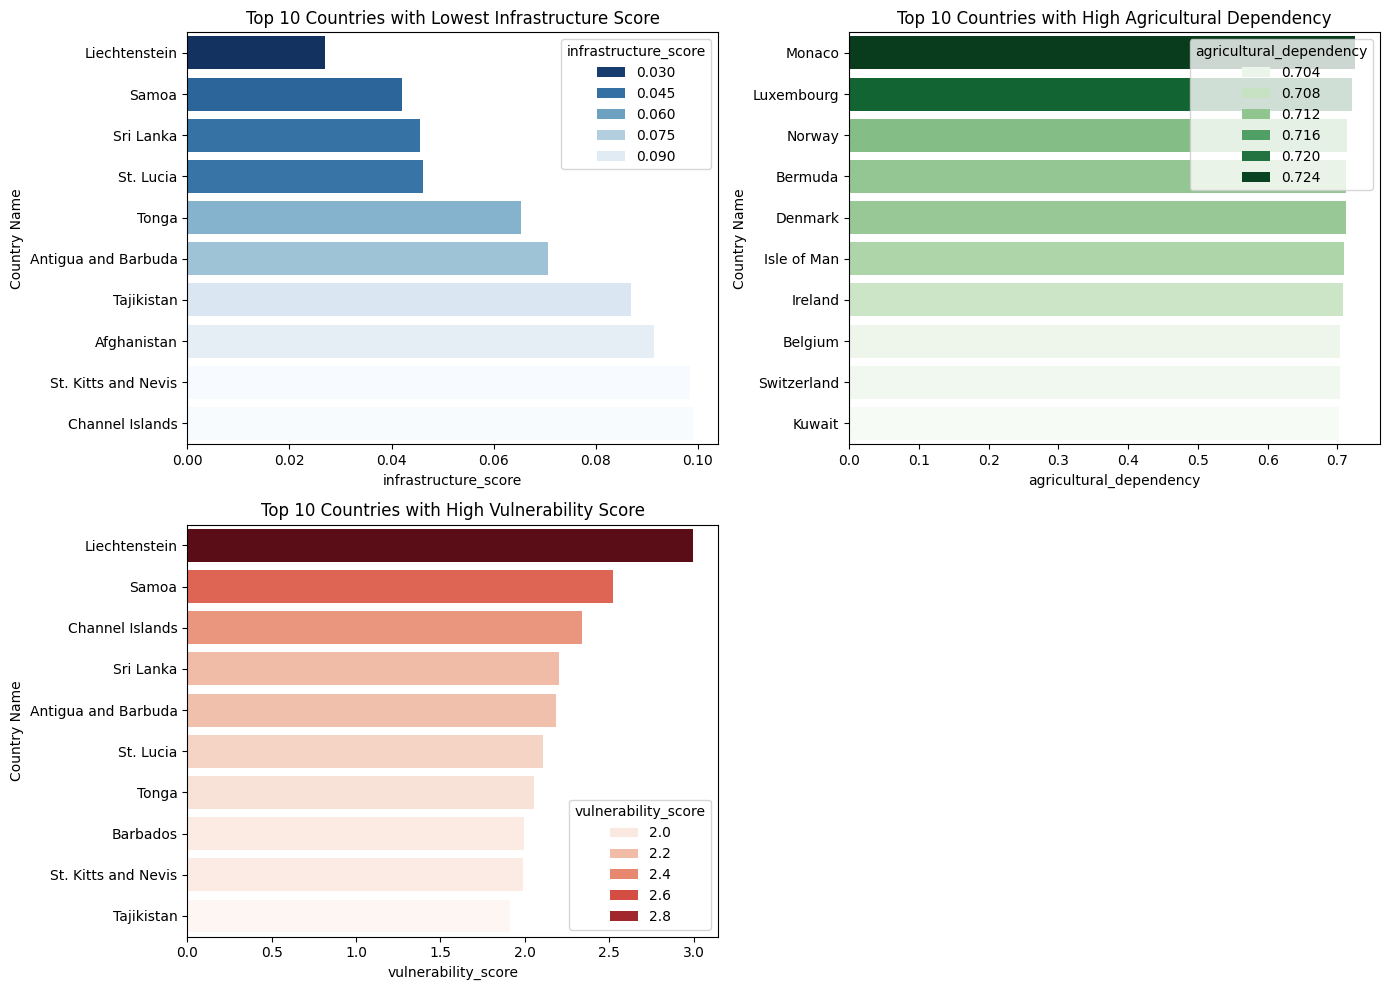

In [60]:
data_2020_1 = wd_data_combined_ind_pivot[wd_data_combined_ind_pivot["Year"] == 2020]

# Rule 1: Lowest infrastructure scores (Top 10)
lowest_infra = data_2020_1.nsmallest(10, "infrastructure_score")

# Rule 2: Highest agricultural dependency scores (Top 10)
highest_agri_dep = data_2020_1.nlargest(10, "agricultural_dependency")

# Rule 3: Highest vulnerability scores (Top 10)
highest_vulnerability = data_2020_1.nlargest(10, "vulnerability_score")

# Initialize a figure with 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Lowest infrastructure scores
sns.barplot(
    data=lowest_infra,
    x="infrastructure_score",
    y="Country Name",
    ax=axs[0, 0],
    hue="infrastructure_score",
    palette="Blues_r",
)
axs[0, 0].set_title("Top 10 Countries with Lowest Infrastructure Score")

# Plot 2: Highest agricultural dependency
sns.barplot(
    data=highest_agri_dep,
    x="agricultural_dependency",
    y="Country Name",
    ax=axs[0, 1],
    hue="agricultural_dependency",
    palette="Greens",
)
axs[0, 1].set_title("Top 10 Countries with High Agricultural Dependency")

# Plot 3: Highest vulnerability scores
sns.barplot(
    data=highest_vulnerability,
    x="vulnerability_score",
    y="Country Name",
    ax=axs[1, 0],
    hue="vulnerability_score",
    palette="Reds",
)
axs[1, 0].set_title("Top 10 Countries with High Vulnerability Score")

axs[1, 1].axis("off")
# Adjust layout
plt.tight_layout()

# Save or show plot
plt.show()

## Clustering using additional indexes

### Assigning Clusters to each country based on FISI and derived indexes

In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

data_2020 = wd_data_combined_ind_pivot[wd_data_combined_ind_pivot["Year"] == 2020]

features = [
    "FISI",
    "Availability_Index",
    "Access_Index",
    "Utilization_Index",
    "Stability_Index",
    "infrastructure_score",
    "agricultural_dependency",
    "vulnerability_score",
]
X = data_2020[features]

# Based on the Elbow plot, choose the optimal number of clusters (say, k=3)
optimal_k = 5

# Fit K-Means with the optimal number of clusters
kmeans = KMeans(
    n_clusters=optimal_k, init="k-means++", max_iter=300, n_init=10, random_state=42
)
data_2020.loc[:, "Cluster"] = kmeans.fit_predict(X)

# Evaluate the clustering using Silhouette Score (optional)
sil_score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.4030060305200023


/var/folders/j1/26nnr5gj74bfpxhb39x2kpr00000gp/T/ipykernel_93752/2278157375.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020.loc[:, "Cluster"] = kmeans.fit_predict(X)


In [62]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=features)
centroids

FISI  Availability_Index  Access_Index  Utilization_Index  \
0  0.514241            0.835764      0.361766           0.185960   
1  0.479677            0.841200      0.341007           0.103139   
2  0.613406            0.847580      0.543238           0.378101   
3  0.494909            0.854523      0.346719           0.108775   
4  0.497251            0.818135      0.342496           0.135770   

   Stability_Index  infrastructure_score  agricultural_dependency  \
0         0.290075              0.204068                 0.557200   
1         0.169493              0.368867                 0.629588   
2         0.364581              0.470436                 0.328652   
3         0.218452              0.290179                 0.596527   
4         0.312550              0.068124                 0.599751   

   vulnerability_score  
0             1.422634  
1             0.271973  
2             0.793143  
3             0.795388  
4             2.229955

### Labeling the clusters based on Centroids for each index

In [63]:
'''cluster_labels = {
    0: "Agriculture-Dependent Moderate Risk Regions with Balanced Food Security",
    1: "High-Vulnerability Transitional Regions with Emerging Food Security Challenges",
    2: "Stable High-Agricultural Regions with Robust Food Security Systems",
    3: "Critically Vulnerable Regions with Severe Food Security Risks",
    4: "Moderately Vulnerable Transitional Regions with Developing Food Security"
}'''

cluster_labels = {
    0: "Moderate Food Security with Low Stability",
    1: "High Availability with Poor Infrastructure",
    2: "High Access with Low Agricultural Dependency",
    3: "Low Availability with Strong Infrastructure",
    4: "Agriculture-Dependent with Low Availability"
}

data_2020.loc[:, 'Cluster_Label'] = data_2020['Cluster'].map(cluster_labels)
data_2020.head()

/var/folders/j1/26nnr5gj74bfpxhb39x2kpr00000gp/T/ipykernel_93752/401264639.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020.loc[:, 'Cluster_Label'] = data_2020['Cluster'].map(cluster_labels)


Country Code Country Name                Region Name         Income Group  \
20           ABW        Aruba  Latin America & Caribbean          High income   
41           AFG  Afghanistan                 South Asia           Low income   
62           AGO       Angola         Sub-Saharan Africa  Lower middle income   
83           ALB      Albania      Europe & Central Asia  Upper middle income   
104          AND      Andorra      Europe & Central Asia          High income   

     Year  Access to electricity (% of population)  \
20   2020                                 0.000000   
41   2020                                 0.023185   
62   2020                                 0.534274   
83   2020                                 0.000000   
104  2020                                 0.000000   

     Agricultural irrigated land (% of total agricultural land)  \
20                                            0.738267            
41                                            0.918009            
62                                            0.934457            
83                                            0.803243            
104                                           0.905735            

     Agricultural land (% of land area)  Agricultural land (sq. km)  \
20                             0.874617                    0.999999   
41                             0.314514                    0.969362   
62                             0.572405                    0.963301   
83                             0.505051                    0.999068   
104                            0.535470                    0.999985   

     Agriculture, forestry, and fishing, value added (% of GDP)  ...  \
20                                            0.999926           ...   
41                                            0.620864           ...   
62                                            0.874300           ...   
83                                            0.756893           ...   
104                                           0.993080           ...   

     Availability_Index  Access_Index  Utilization_Index  Stability_Index  \
20             0.820695      0.356638           0.099685         0.223843   
41             0.867507      0.467414           0.472998         0.453904   
62             0.877855      0.540920           0.374522         0.292481   
83             0.828015      0.334672           0.112971         0.210073   
104            0.847922      0.297042           0.075189         0.279891   

     Risk Category  infrastructure_score  agricultural_dependency  \
20        low risk              0.154548                 0.643315   
41     medium risk              0.091423                 0.330664   
62     medium risk              0.575939                 0.401374   
83        low risk              0.234828                 0.503582   
104       low risk              0.347320                 0.698093   

     vulnerability_score  Cluster  \
20              1.720471        0   
41              1.070901        2   
62              0.584405        2   
83              0.933881        3   
104             0.440303        1   

                                    Cluster_Label  
20      Moderate Food Security with Low Stability  
41   High Access with Low Agricultural Dependency  
62   High Access with Low Agricultural Dependency  
83    Low Availability with Strong Infrastructure  
104    High Availability with Poor Infrastructure  

[5 rows x 57 columns]

### Plotting clusters 

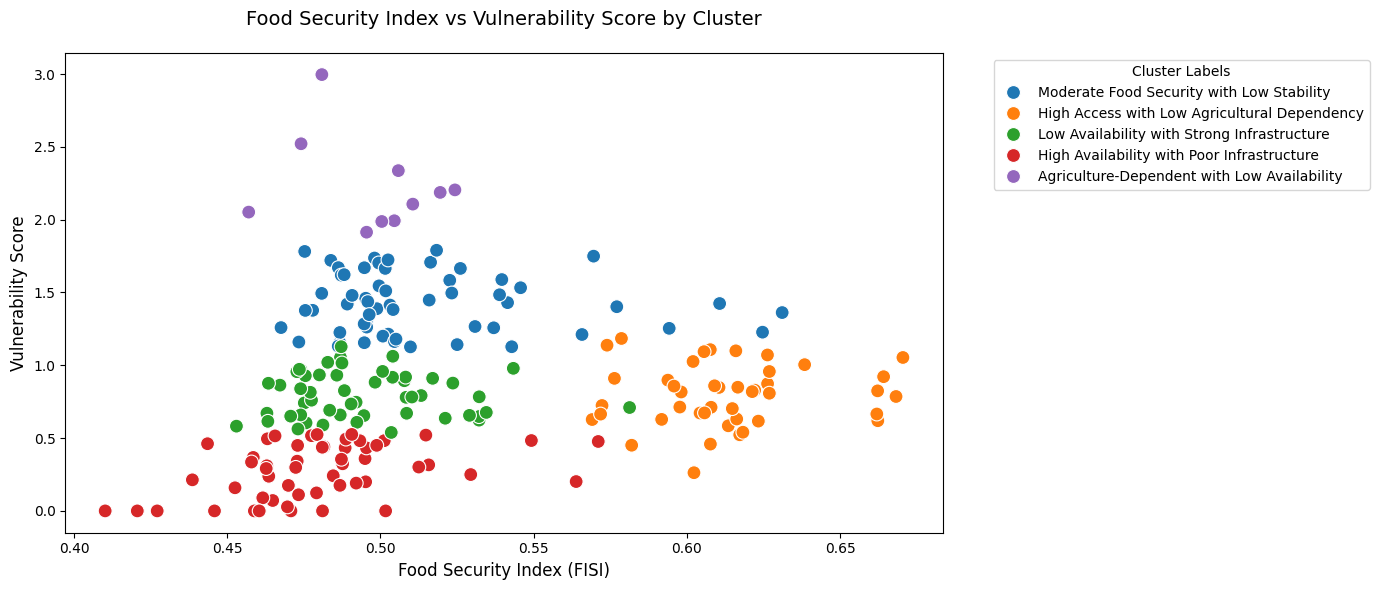

In [64]:
plt.figure(figsize=(14, 6))

# Create scatter plot using seaborn for better aesthetics
sns.scatterplot(
    data=data_2020,
    x="FISI",
    y="vulnerability_score",
    hue="Cluster_Label",
    # style='Cluster_Label',
    s=100,
)  # Some transparency

# Customize the plot
plt.title("Food Security Index vs Vulnerability Score by Cluster", fontsize=14, pad=20)
plt.xlabel("Food Security Index (FISI)", fontsize=12)
plt.ylabel("Vulnerability Score", fontsize=12)

# Adjust legend
plt.legend(
    title="Cluster Labels", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10
)

plt.tight_layout()
plt.show()

In [65]:
import plotly.express as px

df = data_2020

# Assign numeric values to Cluster_Label for coloring
df.loc[:, 'Cluster_Code'] = df['Cluster_Label'].astype('category').cat.codes

# Create the choropleth map
fig = px.choropleth(
    df,
    locations='Country Code',  # Use ISO Alpha-3 codes
    color='Cluster_Code',      # Numeric encoding of cluster labels
    hover_name='Country Name', # Display country name on hover
    hover_data={'Cluster_Label': True, 'Cluster_Code': False},
    color_continuous_scale=px.colors.sequential.Agsunset,  # Customize the colormap
    title='Countries based on Cluster Mapping for Food Insecurity',
    width=1000, 
    height=600 
)

# Show the map
fig.show()

/var/folders/j1/26nnr5gj74bfpxhb39x2kpr00000gp/T/ipykernel_93752/1906699031.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Cluster_Code'] = df['Cluster_Label'].astype('category').cat.codes


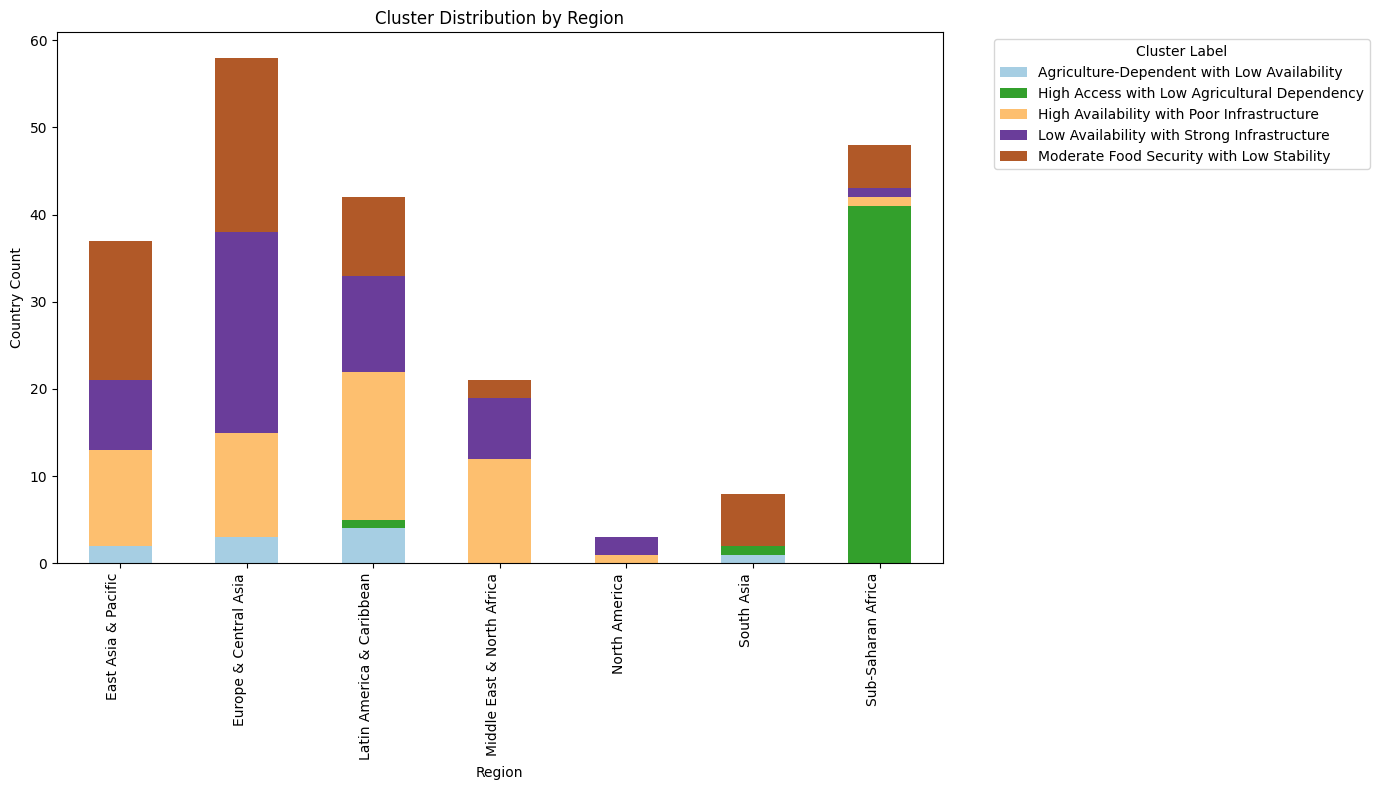

In [66]:
# Group by Region and Cluster, count the number of countries in each cluster per region
cluster_counts = data_2020.groupby(['Region Name', 'Cluster_Label']).size().reset_index(name='Country Count')

# Pivot data for stacked bar chart
pivot_data = cluster_counts.pivot(index='Region Name', columns='Cluster_Label', values='Country Count').fillna(0)

# Plot stacked bar chart
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Paired')

# Customize the plot
plt.title('Cluster Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Country Count')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Cluster Label', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()